In [2]:
#As always, we import everything
import pandas as pd
import os
import re
import hdf5_getters as getters
import requests
from bs4 import BeautifulSoup
import numpy as np
from collections import OrderedDict
from tqdm import tqdm
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords as stop_words
from textblob import Word
import pycountry
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from gensim import corpora, models
import matplotlib as plt
import json
import pickle
import lyricfetcher
import csv
import urllib
from urllib.request import urlopen, HTTPError
import langdetect

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 500

In [3]:
data_dir = '.' + '/data'

In [4]:
year_artist_title_genre = pd.read_csv(os.path.join(data_dir, 'year_artist_name_title_genre.csv'))
unmodified_year_artist_title_genre = year_artist_title_genre

In [ ]:
### END RUN

In [52]:
year_artist_title_genre = year_artist_title_genre.iloc[104863:] # last bit of dataframe

In [53]:
year_artist_title_genre

track_id  year                        artist_name  \
104863  TRDJZHO128F4242C46  2005                              laleh   
104864  TRYFTCH128F4242C56  2005                              laleh   
104865  TRPYFYA128F423E945  2005   lalleshwari (katie jane garside)   
104866  TRVGQBP128F92F1B55  2005                      lalo schifrin   
104867  TRABFUN128F1456BAC  2005                      lamont dozier   
104868  TRSSSVX128F1456BB2  2005                      lamont dozier   
104869  TRWIOXF128F4285AF8  2005                          lana lane   
104870  TRJXNZP128F4285AFA  2005                          lana lane   
104871  TRKFARQ128F4285AF4  2005                          lana lane   
104872  TRKAAQF128F4285AF7  2005                          lana lane   
104873  TRVEAYC12903D06281  2005                              lange   
104874  TRMBTLY128F9300D3F  2005                     langhorne slim   
104875  TRGAYSG128F9300D44  2005                     langhorne slim   
104876  TRARILN128F9300D59  2005                     langhorne slim   
104877  TRAUDWP128F9300D50  2005                     langhorne slim   
104878  TRVAAUU128F9300D5B  2005                     langhorne slim   
104879  TRYBPGV128F9300D52  2005                     langhorne slim   
104880  TRRKBDG128F931087C  2005                        lara fabian   
104881  TREEPVN128F9310875  2005                        lara fabian   
104882  TRVMJZR128F9310881  2005                        lara fabian   
104883  TRDBBZB128F931087A  2005                        lara fabian   
104884  TRBNDQA128F1482B6F  2005                      larrikin love   
104885  TRZZSMB128F148C274  2005                      larry coryell   
104886  TRZVCUL12903CE1004  2005                      larry coryell   
104887  TRYBDYK128E079834B  2005                         las niã±as   
104888  TRUHFUB12903CDB8FE  2005                        lasse lindh   
104889  TRQZJMD128F4285ACE  2005                last autumn's dream   
104890  TRTJBRF128F4285AD9  2005                last autumn's dream   
104891  TRSIQIN128F4285ADD  2005                last autumn's dream   
104892  TRSOLIL128F4285ACB  2005                last autumn's dream   
104893  TRBXPFV128F426A97E  2005                          last step   
104894  TRUIITZ128F426A983  2005                          last step   
104895  TREXSHW128F426A97F  2005                          last step   
104896  TRGQTHN128F423AEDB  2005                        last winter   
104897  TRQGAWU128F423AEE5  2005                        last winter   
104898  TRTJBPB128F423AEE7  2005                        last winter   
104899  TRKKASF128F423AEE2  2005                        last winter   
104900  TRAFLTU128F932BA9A  2005                  late night alumni   
104901  TRTOAZV128F92FCABB  2005                  late night sneaky   
104902  TRSQBOF128F42893B6  2005                          latterman   
104903  TRUEUOW128F93406AF  2005                            lau nau   
104904  TRPXLTJ128F4261B5F  2005                    laurent garnier   
104905  TRJNTFE128F4261B62  2005                    laurent garnier   
104906  TROJDUS128F423603B  2005                    laurent garnier   
104907  TRPYKBZ128EF353B8B  2005                        layzie bone   
104908  TRSKONF128EF353B9B  2005                        layzie bone   
104909  TRPTLYH128F4234A50  2005                  lazarus blackstar   
104910  TRGOPNY128F425DCEF  2005               le peuple de l'herbe   
104911  TRBFHEP128F425DCEA  2005               le peuple de l'herbe   
104912  TRBSPGS128F425DCE9  2005               le peuple de l'herbe   
104913  TRIKRQY128F425DCF0  2005               le peuple de l'herbe   
104914  TRDPYEY128F425DCEB  2005               le peuple de l'herbe   
104915  TRLBCFY128F423D8EA  2005                      le roi soleil   
104916  TRKRCTZ128F4283F8B  2005                      le vibrazioni   
104917  TRRHPST12903D12B74  2005                   le volume courbe   
104918  TRFMUPJ12903D12B89  2005          

In [6]:
#Find the corresponding language for the lyrics
from langdetect import detect

for idx, row in year_artist_title_genre.iterrows():
    try:
        tit = year_artist_title_genre.loc[idx, 'title']
        language = None
        language = detect(tit)
        if language !='en':
            year_artist_title_genre = year_artist_title_genre.drop(idx)
    except:
        pass
    

In [7]:
year_artist_title_genre

track_id  year  \
104865  TRPYFYA128F423E945  2005   
104867  TRABFUN128F1456BAC  2005   
104868  TRSSSVX128F1456BB2  2005   
104869  TRWIOXF128F4285AF8  2005   
104870  TRJXNZP128F4285AFA  2005   
104872  TRKAAQF128F4285AF7  2005   
104873  TRVEAYC12903D06281  2005   
104874  TRMBTLY128F9300D3F  2005   
104877  TRAUDWP128F9300D50  2005   
104878  TRVAAUU128F9300D5B  2005   
104885  TRZZSMB128F148C274  2005   
104889  TRQZJMD128F4285ACE  2005   
104890  TRTJBRF128F4285AD9  2005   
104891  TRSIQIN128F4285ADD  2005   
104892  TRSOLIL128F4285ACB  2005   
104893  TRBXPFV128F426A97E  2005   
104897  TRQGAWU128F423AEE5  2005   
104899  TRKKASF128F423AEE2  2005   
104900  TRAFLTU128F932BA9A  2005   
104901  TRTOAZV128F92FCABB  2005   
104905  TRJNTFE128F4261B62  2005   
104906  TROJDUS128F423603B  2005   
104907  TRPYKBZ128EF353B8B  2005   
104909  TRPTLYH128F4234A50  2005   
104917  TRRHPST12903D12B74  2005   
104918  TRFMUPJ12903D12B89  2005   
104920  TRPTMEI12903D12B79  2005   
104921  TRTOKTU12903D12B8A  2005   
104925  TRALOBU12903CC8451  2005   
104926  TRHJSSV128E078F407  2005   
104928  TRRRBST128E078F401  2005   
104930  TRPSMZZ128E078F400  2005   
104935  TRNFYXO128F92FAC62  2005   
104936  TRPHVMV128F92FAC5A  2005   
104937  TRUCYRX128F92FAC63  2005   
104938  TRLMXNB128F92FAC5D  2005   
104939  TROLKTX128F92FAC5B  2005   
104942  TROUSOR128F92D167B  2005   
104943  TRXCJDR128F92D1680  2005   
104944  TRMKQDP128F14AC219  2005   
104945  TRGHMHI128F14AC218  2005   
104946  TRCKBDP128F14AC21D  2005   
104948  TRVFQPC128F14AC21F  2005   
104949  TRXHAMY128F14AC21B  2005   
104953  TRRATOL128F425A8D1  2005   
104954  TRBWRCI128F42AE3C5  2005   
104955  TRIBELT128F9322549  2005   
104958  TRJKUEE128F42AF0C4  2005   
104960  TRXTSGY128F425A8CA  2005   
104961  TRKWNXX128F92EFA1E  2005   
104965  TRMHMAF128E078A63B  2005   
104967  TRBLVVQ128E078A639  2005   
104968  TRALOST128E078A640  2005   
104971  TRZPIYV128F1487B7A  2005   
104974  TROPINZ128F425F310  2005   
104975  TRYDDWB128F425F31C  2005   
104976  TRMZQCO128E0789D19  2005   
104977  TRMVXWH128E0789D20  2005   
104978  TRWOSMA128E0789D21  2005   
104979  TRCACCO128E0789D1C  2005   
104981  TRLLIZY128E0789D1D  2005   
104983  TRYRWOX128E0789D1E  2005   
104984  TRBQTRV128F9325C03  2005   
104985  TRPIPQP128F92E6E46  2005   
104986  TRRQKDN128F42ACEE9  2005   
104987  TRBMAHY128F42ACF0B  2005   
104992  TRVMYDL128F42ACF01  2005   
104995  TRPVNID128F426F5B2  2005   
104997  TRLFJRS128F92FE4BA  2005   
105000  TRJHBAX12903CDE107  2005   
105001  TRUOGSJ128F4239EF7  2005   
105002  TRONVZK128F4239F04  2005   
105007  TRNJCXV128F423EDF3  2005   
105009  TRPJFRO12903CDEEDD  2005   
105018  TRDVGUY128F92D19C8  2005   
105020  TRPUWYK128F146B23D  2005   
105022  TRFDUNY128F1452955  2005   
105024  TRLUETD128F1452956  2005   
105025  TRSWKMW128F1452952  2005   
105026  TRVJYYQ128F1452950  2005   
105031  TROJAOH128F14522EB  2005   
105032  TRMJQMB128F4298751  2005   
105033  TRGJXKU128F429875A  2005   
105036  TRQVCXZ128F4298756  2005   
105041  TRJKAUI128F429873F  2005   
105044  TRYDUVL128F429875C  2005   
105048  TRWLWNY12903D0D0DE  2005   
105049  TRBGWOE12903D0D0E5  2005   
105050  TRIEVRB12903D0D0E2  2005   
105051  TRUXATP12903D0D0DA  2005   
105053  TRSMFUP12903D0D0DF  2005   
105054  TRSCXBC12903D0D0E4  2005   
105055  TRVOTPP12903D0D0DD  2005   
105056  TROPOMF12903D0D0E1  2005   
105057  TROOYUU12903D0D0DC  2005   
105059  TRWAVUM128F92EE161  2005   
105060  TRWVVRG128F92EE043  2005   
105062  TRPVLDG128F92EE15D  2005   
105066  TRBRBDU128E0798BA2  2005   
105067  TRNRPGA128E0798BAF  2005   
105068  TRNVQDH128F1451683  2005   
105069  TRDTBZG128E0798BA7  2005   
105071  TRGNTLJ128F4273509  2005   
105073  TRFGDJY128F4273523  2005   
105075  TRKEYWB128F931A5F8  2005   
105076  TRYOGQG128F931A618  2005   
105077  TRGJRFM128E0789705  2005   
105079  TRBDXUM128F4292B8F  2005   
105081  TRTUHEJ128F9303057  2005   
105082  TRLNIYA128F4292B86  2005   
105083  TRSFCDZ128F429

In [8]:
year_artist_title_genre.to_csv(os.path.join(data_dir + '104865year_title_artist_genre.csv'))

In [24]:
def scrape_lyrics(artists_list,songs_list):
    '''
    Main scrapping function
    Input: lists of songs and their artists names 
    Output: list of lyrics of the songs and list of songs for which the scrapping did not succeed
    In case the scrapping failed, lyrics are returned as empty strings
    
    The lyrics are scrapped from several websites:
    - metrolyrics
    If failed:
    -azlyrics
    If failed also:
    - lyricswikia
    And if it also failed:
    - through the herokuapp online API (unknown source)
    
    '''
    
    lyrics_not_found = []
    if (len(artists_list) == 0 or len(songs_list) == 0):
        raise ValueError('The provided artists list or songs list is empty')
        
    elif (len(artists_list) != len(songs_list)):
        print("artist list has len: ", len(artists_list))
        print("songs list has len: ", len(songs_list))
        raise ValueError('The provided artists and songs lists have different lenghts')
        
    else:
        lyrics = []
        
        for i in tqdm(range(len(artists_list))):
            
            try:
                lyrics_metro = str(lyricfetcher.get_lyrics('metrolyrics',artists_list[i],songs_list[i]))
                lyrics_metro = re.sub(r'[\[].*?[\]]', '', lyrics_metro.replace('\n', ' '))
                lyrics_metro = re.sub(',', '', lyrics_metro)

                if (lyrics_metro == "" or len(lyrics_metro.split())<3):
                    lyrics_az = str(lyricfetcher.get_lyrics('azlyrics',artists_list[i],songs_list[i]))
                    lyrics_az = re.sub(r'[\[].*?[\]]', '', lyrics_az.replace('\n', ' '))
                    lyrics_az = re.sub(',', '', lyrics_az)

                    if (lyrics_az == "" or len(lyrics_az.split())<3):
                        lyrics_wikia = str(lyricfetcher.get_lyrics('lyricswikia',artists_list[i],songs_list[i]))
                        lyrics_wikia = re.sub(r'[\[].*?[\]]', '', lyrics_wikia.replace('\n', ' '))
                        lyrics_wikia = re.sub(',', '', lyrics_wikia)
                        
                        if (lyrics_wikia == "" or len(lyrics_wikia.split())<3):
                            try:
                                lyrics_herokuapp = json.load(urllib.request.urlopen('http://lyric-api.herokuapp.com/api/find/' 
                                                                                + artists_list[i].replace(' ', '%20') + '/' 
                                                                                + songs_list[i].replace(' ', '%20') + '.html'))['lyric']
                            except:
                                lyrics_herokuapp = ''
                                
                            lyrics_herokuapp = re.sub(r'[\[].*?[\]]', '', lyrics_herokuapp.replace('\n', ' '))
                            lyrics_herokuapp = re.sub(',', '', lyrics_herokuapp)
                            
                            if (lyrics_herokuapp == "" or len(lyrics_herokuapp.split())<3):
                                raise ValueError('No lyrics OR lyrics smaller or equal to 2 words found')
                                
                            else:
                                lyrics.append(lyrics_herokuapp)
                        else:
                            lyrics.append(lyrics_wikia)
                    else:
                        lyrics.append(lyrics_az)

                else:
                    lyrics.append(lyrics_metro)
                    
            except ValueError:
                lyrics_not_found.append([artists_list[i],songs_list[i]])
                lyrics.append("")
                continue
    return lyrics, lyrics_not_found

In [10]:
#Provide BELOW the full set of tracks you would like to get in final (XXX_to_scrape)
#-----------------------------------------------------------------------------
artists_to_scrape1 = list(year_artist_title_genre['artist_name'])
titles_to_scrape1 = list(year_artist_title_genre['title'])
track_ids_to_scrape1 = list(year_artist_title_genre['track_id'])


In [11]:
# The line below calls the scrapping function
lyrics1, lyrics_not_found_list1 = scrape_lyrics(artists_to_scrape1[:5000], titles_to_scrape1[:5000])

100%|██████████| 5000/5000 [1:41:20<00:00,  1.97s/it]  


In [14]:
# Write to CSV. Warning: in "a" mode, if check_for_already_scrapped is true,
# then the writer will write at the end of the actual CSV file

zero_5000_lyrics_csv_filename = os.path.join(data_dir + 'zero_5000_lyrics.csv')
with open(zero_5000_lyrics_csv_filename, "a", newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([artists_to_scrape1[:5000], titles_to_scrape1[:5000],lyrics1])

In [16]:
def create_dataframe_from_rows(csv_filename):
    with open(csv_filename) as fd:
        reader=csv.reader(fd)
        rows=[r for r in reader]
        artist_rows=rows[0]#[row for idx, row in enumerate(reader) if idx == 0][0]
        title_rows=rows[1]#[row for idx, row in enumerate(reader) if idx == 1]
        lyrics_rows=rows[2]#[row for idx, row in enumerate(reader) if idx == 2]#[0]
        diff = len(title_rows) - len(lyrics_rows)
        print(diff)
        print(len(artist_rows))
        print(len(title_rows))
        print(len(lyrics_rows))
        dataframe_created = pd.DataFrame({'Artists': artist_rows,'Titles': title_rows,'Lyrics': lyrics_rows})
        return dataframe_created


one_5000 = create_dataframe_from_rows(zero_5000_lyrics_csv_filename)#os.path.join(data_dir,'zero_5000_lyrics.csv'))
one_5000

0
5000
5000
5000


Artists  \
0          lalleshwari (katie jane garside)   
1                             lamont dozier   
2                             lamont dozier   
3                                 lana lane   
4                                 lana lane   
5                                 lana lane   
6                                     lange   
7                            langhorne slim   
8                            langhorne slim   
9                            langhorne slim   
10                            larry coryell   
11                      last autumn's dream   
12                      last autumn's dream   
13                      last autumn's dream   
14                      last autumn's dream   
15                                last step   
16                              last winter   
17                              last winter   
18                        late night alumni   
19                        late night sneaky   
20                          laurent garnier   
21                          laurent garnier   
22                              layzie bone   
23                        lazarus blackstar   
24                         le volume courbe   
25                         le volume courbe   
26                         le volume courbe   
27                         le volume courbe   
28                                 le sport   
29                                   leaves   
30                                   leaves   
31                                   leaves   
32                           lee ann womack   
33                           lee ann womack   
34                           lee ann womack   
35                           lee ann womack   
36                           lee ann womack   
37                             lee ritenour   
38                             lee ritenour   
39                               lee rocker   
40                               lee rocker   
41                               lee rocker   
42                               lee rocker   
43                               lee rocker   
44                                 lee ryan   
45                                 lee ryan   
46                                 lee ryan   
47                                 lee ryan   
48                                 lee ryan   
49                                 lee ryan   
50                              leela james   
51                              leela james   
52                              leela james   
53                               lemongrass   
54                              lene lovich   
55                              lene lovich   
56                              lene marlin   
57                              lene marlin   
58                              lene marlin   
59                              lene marlin   
60                              lene marlin   
61                              lene marlin   
62                                     lens   
63                                     lens   
64                 leo kottke & mike gordon   
65                 leo kottke & mike gordon   
66                 leo kottke & mike gordon   
67                 leonard santic all stars   
68                                les brown   
69                           les sexareenos   
70            let airplanes circle overhead   
71            let airplanes circle overhead   
72                                   let go   
73                         let's go sailing   
74                             lewis taylor   
75                                    liars   
76                                liberty x   
77                                liberty x   
78                                liberty x   
79                                liberty x   
80                            life of agony   
81                                lifehouse   
82                                lifehouse   
83                                lifehouse   
84                                lifehou

In [17]:
# The line below calls the scrapping function
lyrics5001, lyrics_not_found_list5001 = scrape_lyrics(artists_to_scrape1[5000:6000], titles_to_scrape1[5000:6000])


100%|██████████| 1000/1000 [29:15<00:00,  1.33s/it]


FileNotFoundError: [Errno 2] No such file or directory: './data/ft_6000_lyrics.csv'

In [18]:
# Write to CSV. Warning: in "a" mode, if check_for_already_scrapped is true,
# then the writer will write at the end of the actual CSV file

ft_6000_lyrics_csv_filename = os.path.join(data_dir + 'ft_6000_lyrics.csv')
with open(ft_6000_lyrics_csv_filename, "a", newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([artists_to_scrape1[5000:6000], titles_to_scrape1[5000:6000],lyrics5001])

ft_6000 = create_dataframe_from_rows(ft_6000_lyrics_csv_filename)
ft_6000

0
1000
1000
1000


Artists  \
0                                kenn starr   
1                                kenn starr   
2                                   kenny g   
3                                   kenny g   
4                                   kenny g   
5                                   kenny g   
6                             kenny garrett   
7                             kenny garrett   
8                              kenny rogers   
9                              kenny rogers   
10                             keyshia cole   
11                                   kid606   
12                                   kid606   
13                              kill hannah   
14                              kill hannah   
15                              kill hannah   
16                                     kiln   
17                    kind of like spitting   
18                             kingdom come   
19                             kingdom come   
20                        kingdom of sorrow   
21                                    kinky   
22                                    kinky   
23                                    kinky   
24                             kinnie starr   
25                             kinnie starr   
26                                   kitaro   
27                      kite flying society   
28                                  klaxons   
29                                  klaxons   
30                                  klaxons   
31                                  klaxons   
32                              koffin kats   
33                              koffin kats   
34                              koffin kats   
35                              koffin kats   
36                              koffin kats   
37                               kool savas   
38                                     korn   
39                        kottonmouth kings   
40                              krafty kuts   
41                              krafty kuts   
42                              krafty kuts   
43                              krafty kuts   
44                              krafty kuts   
45                              krafty kuts   
46                              krafty kuts   
47            krafty kuts feat. dynamite mc   
48                              kris drever   
49                              kris drever   
50                              kris drever   
51                              kris drever   
52                                   krokus   
53                                   krokus   
54                                kromestar   
55                           krystal meyers   
56                           krystal meyers   
57                           krystal meyers   
58                           krystal meyers   
59                           krystal meyers   
60                                  kutless   
61                                  kutless   
62                                  kutless   
63                            kyau & albert   
64                            kyau & albert   
65                             kyle andrews   
66                            kyle eastwood   
67                       kyoto jazz massive   
68                                     lite   
69                                     lite   
70                            la kinky beat   
71                              lacuna coil   
72                           lady sovereign   
73                           lady sovereign   
74                           lady sovereign   
75                                 ladyfuzz   
76                                 ladytron   
77                                 ladytron   
78                                 ladytron   
79                                    laleh   
80                                    laleh   
81                                    laleh   
82                                    laleh   
83                                    laleh   
84                                    lal

In [19]:
# The line below calls the scrapping function
lyrics6001, lyrics_not_found_list6001 = scrape_lyrics(artists_to_scrape1[6000:7000], titles_to_scrape1[6000:7000])
# Write to CSV. Warning: in "a" mode, if check_for_already_scrapped is true,
# then the writer will write at the end of the actual CSV file

st_7000_lyrics_csv_filename = os.path.join(data_dir + 'st_7000_lyrics.csv')
with open(st_7000_lyrics_csv_filename, "a", newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([artists_to_scrape1[6000:7000], titles_to_scrape1[6000:7000],lyrics6001])

st_7000 = create_dataframe_from_rows(st_7000_lyrics_csv_filename)
st_7000

100%|██████████| 1000/1000 [29:29<00:00,  1.41s/it] 

0
1000
1000
1000


Artists  \
0                           pinetop seven   
1                             pink razors   
2                             pink razors   
3                             pink razors   
4                               pinmonkey   
5                               pinmonkey   
6                                 placebo   
7                                 placebo   
8                                 placebo   
9                                 placebo   
10                                placebo   
11                                  plaid   
12                        plain white t s   
13                        plain white t's   
14                        plain white t's   
15                        plain white t's   
16                        plain white t's   
17                        plain white t's   
18                        plain white t's   
19                        plain white t's   
20                        plain white t's   
21                          planetshakers   
22                          planetshakers   
23               plastic noise experience   
24               plastic noise experience   
25                            pocketbooks   
26                            poisonblack   
27                            poisonblack   
28                            poisonblack   
29                            poisonblack   
30                            poisonblack   
31                            poisonblack   
32                                pompeii   
33                                pony up   
34                               pop levi   
35                               pop levi   
36                         porter wagoner   
37                         porter wagoner   
38                       portugal the man   
39                       portugal the man   
40                       portugal the man   
41                       portugal the man   
42                       portugal the man   
43                       portugal the man   
44                       portugal the man   
45                       portugal the man   
46                  preemptive strike 0.1   
47                             prefuse 73   
48                             prefuse 73   
49                             prefuse 73   
50                             prefuse 73   
51                             prefuse 73   
52                           pretty maids   
53                           pretty maids   
54                           pretty maids   
55                                  pretz   
56                                  pretz   
57                                  pretz   
58                                  pretz   
59                         pride and fall   
60                         pride and fall   
61                         pride and fall   
62                         pride and fall   
63                         pride and fall   
64                         pride and fall   
65                          primal scream   
66                          primal scream   
67                          primal scream   
68                          primal scream   
69                          primal scream   
70                                 primus   
71                          prince jazzbo   
72                                 prisma   
73                                 prisma   
74                                 prisma   
75                                 prisma   
76                                 promoe   
77                                 promoe   
78                                 promoe   
79                                 promoe   
80                              protokoll   
81                              protokoll   
82                             prototypes   
83                              proto~kaw   
84                              proto~kaw   
85                                  psapp   
86                                  psapp   
87                              psilodump   
88                           

In [25]:
# The line below calls the scrapping function
lyrics7001, lyrics_not_found_list7001 = scrape_lyrics(artists_to_scrape1[7000:10000], titles_to_scrape1[7000:10000])
# Write to CSV. Warning: in "a" mode, if check_for_already_scrapped is true,
# then the writer will write at the end of the actual CSV file






  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 1/3000 [00:02<2:03:48,  2.48s/it]

  0%|          | 2/3000 [00:06<2:25:18,  2.91s/it]

  0%|          | 3/3000 [00:06<1:43:15,  2.07s/it]

  0%|          | 5/3000 [00:06<1:13:30,  1.47s/it]

  0%|          | 7/3000 [00:08<1:06:46,  1.34s/it]

  0%|          | 8/3000 [00:10<1:13:02,  1.46s/it]

  0%|          | 9/3000 [00:16<2:14:11,  2.69s/it]

  0%|          | 10/3000 [00:16<1:45:58,  2.13s/it]

  0%|          | 11/3000 [00:17<1:29:24,  1.79s/it]

  0%|          | 13/3000 [00:18<1:03:40,  1.28s/it]

  0%|          | 14/3000 [00:19<1:05:50,  1.32s/it]

  0%|          | 15/3000 [00:20<1:05:09,  1.31s/it]

  1%|          | 16/3000 [00:21<1:03:08,  1.27s/it]

  1%|          | 17/3000 [00:26<1:58:17,  2.38s/it]

  1%|          | 18/3000 [00:27<1:34:09,  1.89s/it]

  1%|          | 19/3000 [00:28<1:19:43,  1.60s/it]

  1%|          | 20/3000 [00:29<1:07:42,  1.36s/it]

  1%|          | 21/3000 [00:30<1:01:30,  1.24s/it]

  1%|    

 10%|▉         | 298/3000 [08:02<32:29,  1.39it/s]

 10%|▉         | 299/3000 [08:05<1:08:32,  1.52s/it]

 10%|█         | 300/3000 [08:06<1:02:11,  1.38s/it]

 10%|█         | 301/3000 [08:07<52:05,  1.16s/it]  

 10%|█         | 302/3000 [08:07<47:25,  1.05s/it]

 10%|█         | 303/3000 [08:08<42:09,  1.07it/s]

 10%|█         | 304/3000 [08:09<37:45,  1.19it/s]

 10%|█         | 305/3000 [08:09<34:30,  1.30it/s]

 10%|█         | 306/3000 [08:10<32:58,  1.36it/s]

 10%|█         | 307/3000 [08:11<33:18,  1.35it/s]

 10%|█         | 308/3000 [08:12<46:58,  1.05s/it]

 10%|█         | 309/3000 [08:16<1:27:09,  1.94s/it]

 10%|█         | 310/3000 [08:18<1:20:59,  1.81s/it]

 10%|█         | 311/3000 [08:19<1:16:32,  1.71s/it]

 10%|█         | 312/3000 [08:20<1:04:01,  1.43s/it]

 10%|█         | 313/3000 [08:26<2:04:59,  2.79s/it]

 10%|█         | 314/3000 [08:27<1:37:37,  2.18s/it]

 10%|█         | 315/3000 [08:28<1:18:14,  1.75s/it]

 11%|█         | 316/3000 [08:29<1:07:46,  1

 21%|██        | 621/3000 [15:23<53:46,  1.36s/it]

 21%|██        | 622/3000 [15:27<1:34:27,  2.38s/it]

 21%|██        | 623/3000 [15:29<1:24:33,  2.13s/it]

 21%|██        | 624/3000 [15:30<1:13:52,  1.87s/it]

 21%|██        | 625/3000 [15:31<1:01:06,  1.54s/it]

 21%|██        | 626/3000 [15:32<55:14,  1.40s/it]  

 21%|██        | 627/3000 [15:37<1:31:06,  2.30s/it]

 21%|██        | 628/3000 [15:38<1:24:07,  2.13s/it]

 21%|██        | 629/3000 [15:39<1:06:38,  1.69s/it]

 21%|██        | 631/3000 [15:40<51:13,  1.30s/it]  

 21%|██        | 632/3000 [15:40<43:10,  1.09s/it]

 21%|██        | 633/3000 [15:41<37:38,  1.05it/s]

 21%|██        | 634/3000 [15:49<2:01:30,  3.08s/it]

 21%|██        | 635/3000 [15:50<1:40:19,  2.55s/it]

 21%|██        | 636/3000 [15:51<1:21:36,  2.07s/it]

 21%|██        | 637/3000 [15:52<1:06:20,  1.68s/it]

 21%|██▏       | 638/3000 [15:59<2:11:41,  3.35s/it]

 21%|██▏       | 639/3000 [16:00<1:42:52,  2.61s/it]

 21%|██▏       | 640/3000 [16:00<1

 31%|███       | 922/3000 [23:34<28:13,  1.23it/s]

 31%|███       | 923/3000 [23:36<42:22,  1.22s/it]

 31%|███       | 924/3000 [23:38<51:18,  1.48s/it]

 31%|███       | 926/3000 [23:38<36:47,  1.06s/it]

 31%|███       | 927/3000 [23:39<35:25,  1.03s/it]

 31%|███       | 929/3000 [23:39<25:39,  1.35it/s]

 31%|███       | 930/3000 [23:40<26:10,  1.32it/s]

 31%|███       | 931/3000 [23:41<24:47,  1.39it/s]

 31%|███       | 932/3000 [23:42<26:13,  1.31it/s]

 31%|███       | 933/3000 [23:46<1:07:47,  1.97s/it]

 31%|███       | 934/3000 [23:48<1:08:54,  2.00s/it]

 31%|███       | 935/3000 [23:50<1:00:26,  1.76s/it]

 31%|███       | 936/3000 [23:50<50:22,  1.46s/it]  

 31%|███       | 937/3000 [23:51<41:17,  1.20s/it]

 31%|███▏      | 938/3000 [23:52<41:35,  1.21s/it]

 31%|███▏      | 939/3000 [23:54<45:40,  1.33s/it]

 31%|███▏      | 940/3000 [23:56<57:17,  1.67s/it]

 31%|███▏      | 941/3000 [23:59<1:09:56,  2.04s/it]

 31%|███▏      | 942/3000 [24:08<2:16:35,  3.98s/it]



 41%|████      | 1232/3000 [31:22<28:59,  1.02it/s]

 41%|████      | 1233/3000 [31:26<57:33,  1.95s/it]

 41%|████      | 1235/3000 [31:27<43:33,  1.48s/it]

 41%|████      | 1237/3000 [31:27<31:07,  1.06s/it]

 41%|████▏     | 1239/3000 [31:27<22:29,  1.30it/s]

 41%|████▏     | 1241/3000 [31:27<16:17,  1.80it/s]

 41%|████▏     | 1242/3000 [31:28<16:55,  1.73it/s]

 41%|████▏     | 1243/3000 [31:29<17:28,  1.68it/s]

 42%|████▏     | 1245/3000 [31:29<12:47,  2.29it/s]

 42%|████▏     | 1247/3000 [31:29<09:33,  3.06it/s]

 42%|████▏     | 1249/3000 [31:31<13:35,  2.15it/s]

 42%|████▏     | 1250/3000 [31:31<16:38,  1.75it/s]

 42%|████▏     | 1251/3000 [31:38<1:05:07,  2.23s/it]

 42%|████▏     | 1252/3000 [31:38<46:34,  1.60s/it]  

 42%|████▏     | 1253/3000 [31:38<38:16,  1.31s/it]

 42%|████▏     | 1255/3000 [31:41<37:19,  1.28s/it]

 42%|████▏     | 1256/3000 [31:41<31:24,  1.08s/it]

 42%|████▏     | 1257/3000 [31:42<27:20,  1.06it/s]

 42%|████▏     | 1258/3000 [31:47<59:36,  

 52%|█████▏    | 1564/3000 [39:10<44:30,  1.86s/it]

 52%|█████▏    | 1566/3000 [39:10<32:01,  1.34s/it]

 52%|█████▏    | 1567/3000 [39:11<25:25,  1.06s/it]

 52%|█████▏    | 1569/3000 [39:12<21:49,  1.09it/s]

 52%|█████▏    | 1570/3000 [39:13<25:36,  1.07s/it]

 52%|█████▏    | 1571/3000 [39:18<53:10,  2.23s/it]

 52%|█████▏    | 1572/3000 [39:21<56:20,  2.37s/it]

 52%|█████▏    | 1573/3000 [39:21<43:34,  1.83s/it]

 52%|█████▏    | 1574/3000 [39:23<43:35,  1.83s/it]

 52%|█████▎    | 1575/3000 [39:27<1:01:28,  2.59s/it]

 53%|█████▎    | 1576/3000 [39:28<49:04,  2.07s/it]  

 53%|█████▎    | 1577/3000 [39:29<42:01,  1.77s/it]

 53%|█████▎    | 1578/3000 [39:30<33:41,  1.42s/it]

 53%|█████▎    | 1580/3000 [39:32<29:19,  1.24s/it]

 53%|█████▎    | 1581/3000 [39:34<35:09,  1.49s/it]

 53%|█████▎    | 1582/3000 [39:36<38:12,  1.62s/it]

 53%|█████▎    | 1583/3000 [39:40<54:22,  2.30s/it]

 53%|█████▎    | 1585/3000 [39:40<38:31,  1.63s/it]

 53%|█████▎    | 1586/3000 [39:42<41:06,  

 63%|██████▎   | 1879/3000 [47:32<35:47,  1.92s/it]

 63%|██████▎   | 1880/3000 [47:34<37:20,  2.00s/it]

 63%|██████▎   | 1881/3000 [47:35<31:10,  1.67s/it]

 63%|██████▎   | 1882/3000 [47:36<28:40,  1.54s/it]

 63%|██████▎   | 1883/3000 [47:43<58:56,  3.17s/it]

 63%|██████▎   | 1884/3000 [47:44<46:49,  2.52s/it]

 63%|██████▎   | 1885/3000 [47:45<38:22,  2.06s/it]

 63%|██████▎   | 1886/3000 [47:49<52:27,  2.83s/it]

 63%|██████▎   | 1887/3000 [47:51<43:34,  2.35s/it]

 63%|██████▎   | 1888/3000 [47:52<38:25,  2.07s/it]

 63%|██████▎   | 1889/3000 [47:54<38:32,  2.08s/it]

 63%|██████▎   | 1890/3000 [47:55<30:18,  1.64s/it]

 63%|██████▎   | 1891/3000 [48:00<49:21,  2.67s/it]

 63%|██████▎   | 1892/3000 [48:01<38:29,  2.08s/it]

 63%|██████▎   | 1893/3000 [48:03<40:47,  2.21s/it]

 63%|██████▎   | 1894/3000 [48:04<34:04,  1.85s/it]

 63%|██████▎   | 1895/3000 [48:11<58:57,  3.20s/it]

 63%|██████▎   | 1896/3000 [48:13<52:32,  2.86s/it]

 63%|██████▎   | 1898/3000 [48:13<37:09,  2.02

 73%|███████▎  | 2203/3000 [55:15<07:25,  1.79it/s]

 73%|███████▎  | 2204/3000 [55:20<25:04,  1.89s/it]

 74%|███████▎  | 2205/3000 [55:21<21:17,  1.61s/it]

 74%|███████▎  | 2206/3000 [55:24<23:58,  1.81s/it]

 74%|███████▎  | 2207/3000 [55:25<20:49,  1.58s/it]

 74%|███████▎  | 2208/3000 [55:27<23:33,  1.78s/it]

 74%|███████▎  | 2209/3000 [55:32<35:49,  2.72s/it]

 74%|███████▎  | 2210/3000 [55:33<28:37,  2.17s/it]

 74%|███████▎  | 2211/3000 [55:34<24:30,  1.86s/it]

 74%|███████▎  | 2212/3000 [55:35<21:10,  1.61s/it]

 74%|███████▍  | 2213/3000 [55:36<19:43,  1.50s/it]

 74%|███████▍  | 2214/3000 [55:41<31:04,  2.37s/it]

 74%|███████▍  | 2215/3000 [55:42<27:04,  2.07s/it]

 74%|███████▍  | 2216/3000 [55:43<21:24,  1.64s/it]

 74%|███████▍  | 2217/3000 [55:44<20:53,  1.60s/it]

 74%|███████▍  | 2218/3000 [55:45<17:07,  1.31s/it]

 74%|███████▍  | 2219/3000 [55:45<14:23,  1.11s/it]

 74%|███████▍  | 2220/3000 [55:51<30:47,  2.37s/it]

 74%|███████▍  | 2221/3000 [55:51<22:29,  1.73

 84%|████████▍ | 2515/3000 [1:04:08<11:45,  1.46s/it]

 84%|████████▍ | 2516/3000 [1:04:09<11:08,  1.38s/it]

 84%|████████▍ | 2517/3000 [1:04:10<09:15,  1.15s/it]

 84%|████████▍ | 2518/3000 [1:04:10<08:14,  1.03s/it]

 84%|████████▍ | 2519/3000 [1:04:15<17:16,  2.16s/it]

 84%|████████▍ | 2520/3000 [1:04:16<14:32,  1.82s/it]

 84%|████████▍ | 2521/3000 [1:04:18<15:03,  1.89s/it]

 84%|████████▍ | 2523/3000 [1:04:18<10:41,  1.35s/it]

 84%|████████▍ | 2525/3000 [1:04:19<07:36,  1.04it/s]

 84%|████████▍ | 2526/3000 [1:04:19<07:17,  1.08it/s]

 84%|████████▍ | 2527/3000 [1:04:20<05:51,  1.35it/s]

 84%|████████▍ | 2528/3000 [1:04:20<04:23,  1.79it/s]

 84%|████████▍ | 2529/3000 [1:04:20<04:26,  1.77it/s]

 84%|████████▍ | 2530/3000 [1:04:25<14:54,  1.90s/it]

 84%|████████▍ | 2531/3000 [1:04:27<12:58,  1.66s/it]

 84%|████████▍ | 2532/3000 [1:04:28<13:39,  1.75s/it]

 84%|████████▍ | 2533/3000 [1:04:29<11:55,  1.53s/it]

 84%|████████▍ | 2534/3000 [1:04:36<22:39,  2.92s/it]

 84%|█████

 94%|█████████▍| 2828/3000 [1:11:22<04:53,  1.71s/it]

 94%|█████████▍| 2829/3000 [1:11:24<05:18,  1.86s/it]

 94%|█████████▍| 2830/3000 [1:11:29<08:09,  2.88s/it]

 94%|█████████▍| 2831/3000 [1:11:30<06:34,  2.33s/it]

 94%|█████████▍| 2832/3000 [1:11:32<05:43,  2.04s/it]

 94%|█████████▍| 2833/3000 [1:11:33<04:54,  1.76s/it]

 94%|█████████▍| 2834/3000 [1:11:35<05:23,  1.95s/it]

 94%|█████████▍| 2835/3000 [1:11:40<07:19,  2.66s/it]

 95%|█████████▍| 2837/3000 [1:11:40<05:07,  1.89s/it]

 95%|█████████▍| 2839/3000 [1:11:40<03:36,  1.34s/it]

 95%|█████████▍| 2841/3000 [1:11:40<02:33,  1.03it/s]

 95%|█████████▍| 2843/3000 [1:11:41<02:02,  1.28it/s]

 95%|█████████▍| 2844/3000 [1:11:41<01:53,  1.37it/s]

 95%|█████████▍| 2845/3000 [1:11:42<01:47,  1.45it/s]

 95%|█████████▍| 2846/3000 [1:11:44<02:34,  1.00s/it]

 95%|█████████▍| 2847/3000 [1:11:48<05:14,  2.05s/it]

 95%|█████████▍| 2849/3000 [1:11:48<03:41,  1.47s/it]

 95%|█████████▌| 2851/3000 [1:11:49<02:36,  1.05s/it]

 95%|█████

0
3000
3000
3000


Artists  \
0                               the envy corps   
1                                    the exies   
2                                   the falcon   
3                                   the falcon   
4                                   the falcon   
5                                   the falcon   
6                                   the falcon   
7                            the fallout trust   
8                                  the feeling   
9                          the felice brothers   
10                                   the fever   
11                          the fiery furnaces   
12                          the fiery furnaces   
13                      the fine arts showcase   
14                      the fine arts showcase   
15                      the fine arts showcase   
16                      the fine arts showcase   
17                            the flaming lips   
18                            the flaming lips   
19                       the flaming sideburns   
20                           the flaming stars   
21                            the flower kings   
22                            the flower kings   
23                                    the fold   
24                                    the fold   
25                                    the fold   
26                the foundry field recordings   
27                the foundry field recordings   
28                               the four aces   
29                               the four aces   
30                               the fratellis   
31                               the fratellis   
32                               the fratellis   
33                               the fratellis   
34                               the fratellis   
35                               the fratellis   
36                               the fratellis   
37                    the freelance hellraiser   
38                    the freelance hellraiser   
39                             the futureheads   
40                             the futureheads   
41                             the futureheads   
42                             the futureheads   
43                             the futureheads   
44                             the futureheads   
45                             the futureheads   
46                             the futureheads   
47                             the futureheads   
48                             the futureheads   
49                         the gaslight anthem   
50                                    the gift   
51                         the god damn whores   
52                         the god damn whores   
53                             the golden dogs   
54                             the golden dogs   
55                             the golden dogs   
56                             the golden dogs   
57                             the golden dogs   
58                             the golden dogs   
59             the good_ the bad and the queen   
60                                the grascals   
61                                the grascals   
62                                the grascals   
63                                the grascals   
64                                the grascals   
65                                the grascals   
66                                  the grates   
67                                  the grates   
68                          the gresham flyers   
69                                    the grid   
70                           the heart attacks   
71                           the heart attacks   
72                               the hentchmen   
73                          the hidden cameras   
74                          the hidden cameras   
75                          the hidden cameras   
76                             the hold steady   
77                             the hold steady   
78                             the hold steady   
79                             the hold

In [32]:
st_10000_lyrics_csv_filename = os.path.join(data_dir + 'st_10000_lyrics.csv')
with open(st_10000_lyrics_csv_filename, "a", newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([artists_to_scrape1[7000:10000], titles_to_scrape1[7000:10000],lyrics7001])

st_10000 = create_dataframe_from_rows(st_10000_lyrics_csv_filename)
st_10000

0
3000
3000
3000


Artists  \
0                               the envy corps   
1                                    the exies   
2                                   the falcon   
3                                   the falcon   
4                                   the falcon   
5                                   the falcon   
6                                   the falcon   
7                            the fallout trust   
8                                  the feeling   
9                          the felice brothers   
10                                   the fever   
11                          the fiery furnaces   
12                          the fiery furnaces   
13                      the fine arts showcase   
14                      the fine arts showcase   
15                      the fine arts showcase   
16                      the fine arts showcase   
17                            the flaming lips   
18                            the flaming lips   
19                       the flaming sideburns   
20                           the flaming stars   
21                            the flower kings   
22                            the flower kings   
23                                    the fold   
24                                    the fold   
25                                    the fold   
26                the foundry field recordings   
27                the foundry field recordings   
28                               the four aces   
29                               the four aces   
30                               the fratellis   
31                               the fratellis   
32                               the fratellis   
33                               the fratellis   
34                               the fratellis   
35                               the fratellis   
36                               the fratellis   
37                    the freelance hellraiser   
38                    the freelance hellraiser   
39                             the futureheads   
40                             the futureheads   
41                             the futureheads   
42                             the futureheads   
43                             the futureheads   
44                             the futureheads   
45                             the futureheads   
46                             the futureheads   
47                             the futureheads   
48                             the futureheads   
49                         the gaslight anthem   
50                                    the gift   
51                         the god damn whores   
52                         the god damn whores   
53                             the golden dogs   
54                             the golden dogs   
55                             the golden dogs   
56                             the golden dogs   
57                             the golden dogs   
58                             the golden dogs   
59             the good_ the bad and the queen   
60                                the grascals   
61                                the grascals   
62                                the grascals   
63                                the grascals   
64                                the grascals   
65                                the grascals   
66                                  the grates   
67                                  the grates   
68                          the gresham flyers   
69                                    the grid   
70                           the heart attacks   
71                           the heart attacks   
72                               the hentchmen   
73                          the hidden cameras   
74                          the hidden cameras   
75                          the hidden cameras   
76                             the hold steady   
77                             the hold steady   
78                             the hold steady   
79                             the hold

In [26]:
# The line below calls the scrapping function
lyrics10001, lyrics_not_found_list10001 = scrape_lyrics(artists_to_scrape1[10000:15000], titles_to_scrape1[10000:15000])
# Write to CSV. Warning: in "a" mode, if check_for_already_scrapped is true,
# then the writer will write at the end of the actual CSV file





  0%|          | 0/5000 [00:00<?, ?it/s]

  0%|          | 1/5000 [00:04<6:05:03,  4.38s/it]

  0%|          | 2/5000 [00:06<5:17:38,  3.81s/it]

  0%|          | 3/5000 [00:08<4:12:59,  3.04s/it]

  0%|          | 4/5000 [00:08<3:12:24,  2.31s/it]

  0%|          | 5/5000 [00:13<4:07:57,  2.98s/it]

  0%|          | 6/5000 [00:13<3:08:33,  2.27s/it]

  0%|          | 7/5000 [00:14<2:27:27,  1.77s/it]

  0%|          | 8/5000 [00:15<1:58:32,  1.42s/it]

  0%|          | 9/5000 [00:15<1:43:55,  1.25s/it]

  0%|          | 10/5000 [00:17<1:43:53,  1.25s/it]

  0%|          | 11/5000 [00:18<1:38:18,  1.18s/it]

  0%|          | 12/5000 [00:21<2:39:08,  1.91s/it]

  0%|          | 13/5000 [00:24<3:01:49,  2.19s/it]

  0%|          | 14/5000 [00:26<2:58:19,  2.15s/it]

  0%|          | 15/5000 [00:28<2:55:50,  2.12s/it]

  0%|          | 16/5000 [00:33<4:10:37,  3.02s/it]

  0%|          | 17/5000 [00:35<3:25:39,  2.48s/it]

  0%|          | 18/5000 [00:36<2:53:09,  2.09s/it]

  0%|      

  6%|▌         | 303/5000 [08:21<1:48:06,  1.38s/it]

  6%|▌         | 304/5000 [08:26<3:21:49,  2.58s/it]

  6%|▌         | 305/5000 [08:29<3:09:08,  2.42s/it]

  6%|▌         | 306/5000 [08:31<3:00:27,  2.31s/it]

  6%|▌         | 307/5000 [08:36<4:04:01,  3.12s/it]

  6%|▌         | 308/5000 [08:39<4:05:15,  3.14s/it]

  6%|▌         | 309/5000 [08:41<3:42:38,  2.85s/it]

  6%|▌         | 310/5000 [08:42<2:53:56,  2.23s/it]

  6%|▌         | 311/5000 [08:47<4:04:41,  3.13s/it]

  6%|▌         | 312/5000 [08:49<3:32:51,  2.72s/it]

  6%|▋         | 313/5000 [08:50<2:49:06,  2.16s/it]

  6%|▋         | 314/5000 [08:51<2:23:41,  1.84s/it]

  6%|▋         | 315/5000 [08:52<2:02:48,  1.57s/it]

  6%|▋         | 316/5000 [08:57<3:20:44,  2.57s/it]

  6%|▋         | 317/5000 [08:58<3:00:14,  2.31s/it]

  6%|▋         | 318/5000 [09:00<2:38:37,  2.03s/it]

  6%|▋         | 319/5000 [09:01<2:32:22,  1.95s/it]

  6%|▋         | 320/5000 [09:03<2:28:12,  1.90s/it]

  6%|▋         | 321/5000 [0

 12%|█▏        | 584/5000 [17:24<2:11:58,  1.79s/it]

 12%|█▏        | 585/5000 [17:25<2:00:41,  1.64s/it]

 12%|█▏        | 586/5000 [17:27<1:55:14,  1.57s/it]

 12%|█▏        | 587/5000 [17:30<2:45:30,  2.25s/it]

 12%|█▏        | 588/5000 [17:32<2:33:51,  2.09s/it]

 12%|█▏        | 589/5000 [17:33<2:13:24,  1.81s/it]

 12%|█▏        | 590/5000 [17:34<1:56:36,  1.59s/it]

 12%|█▏        | 591/5000 [17:35<1:38:56,  1.35s/it]

 12%|█▏        | 592/5000 [17:40<2:50:16,  2.32s/it]

 12%|█▏        | 593/5000 [17:41<2:18:11,  1.88s/it]

 12%|█▏        | 594/5000 [17:42<2:12:56,  1.81s/it]

 12%|█▏        | 595/5000 [17:43<1:56:56,  1.59s/it]

 12%|█▏        | 596/5000 [17:45<2:01:35,  1.66s/it]

 12%|█▏        | 597/5000 [17:50<3:06:23,  2.54s/it]

 12%|█▏        | 598/5000 [17:50<2:27:43,  2.01s/it]

 12%|█▏        | 599/5000 [17:52<2:22:12,  1.94s/it]

 12%|█▏        | 600/5000 [17:53<1:57:07,  1.60s/it]

 12%|█▏        | 601/5000 [17:54<1:42:15,  1.39s/it]

 12%|█▏        | 602/5000 [1

 17%|█▋        | 870/5000 [25:26<2:04:43,  1.81s/it]

 17%|█▋        | 871/5000 [25:27<1:51:13,  1.62s/it]

 17%|█▋        | 872/5000 [25:28<1:45:25,  1.53s/it]

 17%|█▋        | 873/5000 [25:29<1:37:48,  1.42s/it]

 17%|█▋        | 874/5000 [25:31<1:44:21,  1.52s/it]

 18%|█▊        | 875/5000 [25:33<1:50:36,  1.61s/it]

 18%|█▊        | 876/5000 [25:34<1:36:15,  1.40s/it]

 18%|█▊        | 877/5000 [25:35<1:22:35,  1.20s/it]

 18%|█▊        | 878/5000 [25:35<1:09:33,  1.01s/it]

 18%|█▊        | 879/5000 [25:36<1:02:36,  1.10it/s]

 18%|█▊        | 880/5000 [25:37<1:01:36,  1.11it/s]

 18%|█▊        | 881/5000 [25:38<1:01:06,  1.12it/s]

 18%|█▊        | 882/5000 [25:39<1:21:24,  1.19s/it]

 18%|█▊        | 883/5000 [25:44<2:20:56,  2.05s/it]

 18%|█▊        | 884/5000 [25:45<2:01:10,  1.77s/it]

 18%|█▊        | 885/5000 [25:46<1:55:09,  1.68s/it]

 18%|█▊        | 886/5000 [25:47<1:43:44,  1.51s/it]

 18%|█▊        | 887/5000 [25:48<1:26:18,  1.26s/it]

 18%|█▊        | 888/5000 [2

 23%|██▎       | 1141/5000 [34:39<2:48:26,  2.62s/it]

 23%|██▎       | 1142/5000 [34:40<2:22:15,  2.21s/it]

 23%|██▎       | 1143/5000 [34:41<1:59:27,  1.86s/it]

 23%|██▎       | 1144/5000 [34:42<1:34:21,  1.47s/it]

 23%|██▎       | 1145/5000 [34:42<1:18:19,  1.22s/it]

 23%|██▎       | 1146/5000 [34:47<2:35:28,  2.42s/it]

 23%|██▎       | 1147/5000 [34:48<2:09:43,  2.02s/it]

 23%|██▎       | 1148/5000 [34:50<2:03:11,  1.92s/it]

 23%|██▎       | 1149/5000 [34:55<2:51:44,  2.68s/it]

 23%|██▎       | 1150/5000 [34:59<3:20:50,  3.13s/it]

 23%|██▎       | 1151/5000 [35:01<2:59:57,  2.81s/it]

 23%|██▎       | 1152/5000 [35:04<2:58:03,  2.78s/it]

 23%|██▎       | 1153/5000 [35:09<3:50:05,  3.59s/it]

 23%|██▎       | 1154/5000 [35:10<2:50:34,  2.66s/it]

 23%|██▎       | 1155/5000 [35:10<2:14:26,  2.10s/it]

 23%|██▎       | 1156/5000 [35:13<2:17:56,  2.15s/it]

 23%|██▎       | 1157/5000 [35:16<2:44:17,  2.57s/it]

 23%|██▎       | 1158/5000 [35:19<2:55:30,  2.74s/it]

 23%|██▎  

 28%|██▊       | 1419/5000 [44:53<3:02:29,  3.06s/it]

 28%|██▊       | 1420/5000 [44:54<2:39:21,  2.67s/it]

 28%|██▊       | 1421/5000 [44:57<2:33:09,  2.57s/it]

 28%|██▊       | 1422/5000 [45:00<2:50:25,  2.86s/it]

 28%|██▊       | 1423/5000 [45:03<2:45:55,  2.78s/it]

 28%|██▊       | 1424/5000 [45:04<2:14:26,  2.26s/it]

 28%|██▊       | 1425/5000 [45:07<2:19:56,  2.35s/it]

 29%|██▊       | 1426/5000 [45:08<2:02:41,  2.06s/it]

 29%|██▊       | 1427/5000 [45:13<2:59:55,  3.02s/it]

 29%|██▊       | 1428/5000 [45:15<2:42:29,  2.73s/it]

 29%|██▊       | 1429/5000 [45:16<2:08:35,  2.16s/it]

 29%|██▊       | 1430/5000 [45:17<1:48:22,  1.82s/it]

 29%|██▊       | 1431/5000 [45:22<2:43:17,  2.75s/it]

 29%|██▊       | 1432/5000 [45:23<2:15:28,  2.28s/it]

 29%|██▊       | 1433/5000 [45:24<1:51:32,  1.88s/it]

 29%|██▊       | 1434/5000 [45:25<1:37:35,  1.64s/it]

 29%|██▊       | 1435/5000 [45:27<1:40:27,  1.69s/it]

 29%|██▊       | 1436/5000 [45:33<2:50:24,  2.87s/it]

 29%|██▊  

 34%|███▍      | 1690/5000 [55:08<2:20:47,  2.55s/it]

 34%|███▍      | 1691/5000 [55:10<2:14:23,  2.44s/it]

 34%|███▍      | 1692/5000 [55:11<1:50:58,  2.01s/it]

 34%|███▍      | 1693/5000 [55:17<2:46:52,  3.03s/it]

 34%|███▍      | 1694/5000 [55:18<2:13:46,  2.43s/it]

 34%|███▍      | 1695/5000 [55:19<2:02:50,  2.23s/it]

 34%|███▍      | 1696/5000 [55:21<1:59:47,  2.18s/it]

 34%|███▍      | 1697/5000 [55:26<2:42:12,  2.95s/it]

 34%|███▍      | 1698/5000 [55:27<2:10:00,  2.36s/it]

 34%|███▍      | 1699/5000 [55:28<1:47:33,  1.95s/it]

 34%|███▍      | 1700/5000 [55:29<1:28:26,  1.61s/it]

 34%|███▍      | 1701/5000 [55:30<1:21:17,  1.48s/it]

 34%|███▍      | 1702/5000 [55:32<1:23:40,  1.52s/it]

 34%|███▍      | 1703/5000 [55:40<3:13:58,  3.53s/it]

 34%|███▍      | 1704/5000 [55:42<2:55:21,  3.19s/it]

 34%|███▍      | 1705/5000 [55:45<2:44:24,  2.99s/it]

 34%|███▍      | 1706/5000 [55:49<3:03:24,  3.34s/it]

 34%|███▍      | 1707/5000 [55:50<2:29:32,  2.72s/it]

 34%|███▍ 

 39%|███▉      | 1963/5000 [1:04:54<1:05:11,  1.29s/it]

 39%|███▉      | 1964/5000 [1:04:55<1:06:37,  1.32s/it]

 39%|███▉      | 1965/5000 [1:04:56<1:07:40,  1.34s/it]

 39%|███▉      | 1966/5000 [1:05:00<1:43:27,  2.05s/it]

 39%|███▉      | 1967/5000 [1:05:01<1:20:14,  1.59s/it]

 39%|███▉      | 1968/5000 [1:05:01<1:05:53,  1.30s/it]

 39%|███▉      | 1969/5000 [1:05:02<55:15,  1.09s/it]  

 39%|███▉      | 1970/5000 [1:05:02<47:41,  1.06it/s]

 39%|███▉      | 1971/5000 [1:05:03<41:08,  1.23it/s]

 39%|███▉      | 1972/5000 [1:05:04<46:12,  1.09it/s]

 39%|███▉      | 1973/5000 [1:05:05<49:26,  1.02it/s]

 39%|███▉      | 1974/5000 [1:05:07<1:01:53,  1.23s/it]

 40%|███▉      | 1975/5000 [1:05:10<1:34:36,  1.88s/it]

 40%|███▉      | 1976/5000 [1:05:12<1:25:33,  1.70s/it]

 40%|███▉      | 1977/5000 [1:05:13<1:18:56,  1.57s/it]

 40%|███▉      | 1978/5000 [1:05:14<1:07:59,  1.35s/it]

 40%|███▉      | 1979/5000 [1:05:15<1:00:04,  1.19s/it]

 40%|███▉      | 1980/5000 [1:05:16<55:

 44%|████▍     | 2223/5000 [1:11:56<1:05:10,  1.41s/it]

 44%|████▍     | 2224/5000 [1:11:57<1:04:13,  1.39s/it]

 44%|████▍     | 2225/5000 [1:11:59<1:03:35,  1.37s/it]

 45%|████▍     | 2226/5000 [1:12:03<1:45:51,  2.29s/it]

 45%|████▍     | 2227/5000 [1:12:04<1:32:24,  2.00s/it]

 45%|████▍     | 2228/5000 [1:12:05<1:18:30,  1.70s/it]

 45%|████▍     | 2229/5000 [1:12:07<1:13:50,  1.60s/it]

 45%|████▍     | 2230/5000 [1:12:08<1:05:51,  1.43s/it]

 45%|████▍     | 2231/5000 [1:12:12<1:43:50,  2.25s/it]

 45%|████▍     | 2232/5000 [1:12:13<1:34:32,  2.05s/it]

 45%|████▍     | 2233/5000 [1:12:15<1:28:33,  1.92s/it]

 45%|████▍     | 2234/5000 [1:12:16<1:16:13,  1.65s/it]

 45%|████▍     | 2235/5000 [1:12:17<1:11:39,  1.55s/it]

 45%|████▍     | 2236/5000 [1:12:18<1:00:56,  1.32s/it]

 45%|████▍     | 2237/5000 [1:12:23<1:44:25,  2.27s/it]

 45%|████▍     | 2238/5000 [1:12:24<1:28:12,  1.92s/it]

 45%|████▍     | 2239/5000 [1:12:25<1:18:41,  1.71s/it]

 45%|████▍     | 2240/5000 [1:1

 50%|████▉     | 2484/5000 [1:20:30<1:46:02,  2.53s/it]

 50%|████▉     | 2485/5000 [1:20:32<1:44:00,  2.48s/it]

 50%|████▉     | 2486/5000 [1:20:36<2:05:22,  2.99s/it]

 50%|████▉     | 2487/5000 [1:20:38<1:51:35,  2.66s/it]

 50%|████▉     | 2488/5000 [1:20:39<1:30:41,  2.17s/it]

 50%|████▉     | 2489/5000 [1:20:40<1:19:49,  1.91s/it]

 50%|████▉     | 2490/5000 [1:20:46<2:01:33,  2.91s/it]

 50%|████▉     | 2491/5000 [1:20:47<1:40:38,  2.41s/it]

 50%|████▉     | 2492/5000 [1:20:48<1:24:59,  2.03s/it]

 50%|████▉     | 2493/5000 [1:20:50<1:28:49,  2.13s/it]

 50%|████▉     | 2494/5000 [1:20:55<2:04:42,  2.99s/it]

 50%|████▉     | 2495/5000 [1:20:57<1:54:30,  2.74s/it]

 50%|████▉     | 2496/5000 [1:20:58<1:29:49,  2.15s/it]

 50%|████▉     | 2497/5000 [1:20:59<1:12:39,  1.74s/it]

 50%|████▉     | 2498/5000 [1:21:00<1:03:43,  1.53s/it]

 50%|████▉     | 2499/5000 [1:21:01<54:09,  1.30s/it]  

 50%|█████     | 2500/5000 [1:21:06<1:42:29,  2.46s/it]

 50%|█████     | 2501/5000 [1:2

 55%|█████▍    | 2744/5000 [1:29:16<1:22:27,  2.19s/it]

 55%|█████▍    | 2745/5000 [1:29:20<1:46:37,  2.84s/it]

 55%|█████▍    | 2746/5000 [1:29:21<1:25:45,  2.28s/it]

 55%|█████▍    | 2747/5000 [1:29:23<1:17:56,  2.08s/it]

 55%|█████▍    | 2748/5000 [1:29:24<1:08:28,  1.82s/it]

 55%|█████▍    | 2749/5000 [1:29:25<1:03:25,  1.69s/it]

 55%|█████▌    | 2750/5000 [1:29:30<1:31:06,  2.43s/it]

 55%|█████▌    | 2751/5000 [1:29:32<1:25:14,  2.27s/it]

 55%|█████▌    | 2752/5000 [1:29:33<1:12:04,  1.92s/it]

 55%|█████▌    | 2753/5000 [1:29:34<1:02:35,  1.67s/it]

 55%|█████▌    | 2754/5000 [1:29:37<1:16:38,  2.05s/it]

 55%|█████▌    | 2755/5000 [1:29:41<1:39:40,  2.66s/it]

 55%|█████▌    | 2756/5000 [1:29:43<1:31:31,  2.45s/it]

 55%|█████▌    | 2757/5000 [1:29:43<1:12:45,  1.95s/it]

 55%|█████▌    | 2758/5000 [1:29:44<59:40,  1.60s/it]  

 55%|█████▌    | 2759/5000 [1:29:45<51:47,  1.39s/it]

 55%|█████▌    | 2760/5000 [1:29:50<1:26:13,  2.31s/it]

 55%|█████▌    | 2761/5000 [1:29:

 60%|██████    | 3005/5000 [1:38:54<1:24:49,  2.55s/it]

 60%|██████    | 3006/5000 [1:38:56<1:21:49,  2.46s/it]

 60%|██████    | 3007/5000 [1:38:59<1:26:41,  2.61s/it]

 60%|██████    | 3008/5000 [1:39:05<2:01:50,  3.67s/it]

 60%|██████    | 3009/5000 [1:39:06<1:32:58,  2.80s/it]

 60%|██████    | 3010/5000 [1:39:07<1:12:44,  2.19s/it]

 60%|██████    | 3011/5000 [1:39:07<58:40,  1.77s/it]  

 60%|██████    | 3012/5000 [1:39:09<54:42,  1.65s/it]

 60%|██████    | 3013/5000 [1:39:14<1:31:26,  2.76s/it]

 60%|██████    | 3014/5000 [1:39:15<1:16:35,  2.31s/it]

 60%|██████    | 3015/5000 [1:39:17<1:14:22,  2.25s/it]

 60%|██████    | 3016/5000 [1:39:19<1:08:31,  2.07s/it]

 60%|██████    | 3017/5000 [1:39:21<1:05:56,  2.00s/it]

 60%|██████    | 3018/5000 [1:39:24<1:14:33,  2.26s/it]

 60%|██████    | 3019/5000 [1:39:25<1:09:07,  2.09s/it]

 60%|██████    | 3020/5000 [1:39:26<56:32,  1.71s/it]  

 60%|██████    | 3021/5000 [1:39:27<47:10,  1.43s/it]

 60%|██████    | 3022/5000 [1:39:29

 66%|██████▌   | 3275/5000 [1:48:01<55:04,  1.92s/it]

 66%|██████▌   | 3277/5000 [1:48:02<44:31,  1.55s/it]

 66%|██████▌   | 3278/5000 [1:48:03<38:44,  1.35s/it]

 66%|██████▌   | 3279/5000 [1:48:07<1:05:32,  2.29s/it]

 66%|██████▌   | 3280/5000 [1:48:08<52:30,  1.83s/it]  

 66%|██████▌   | 3281/5000 [1:48:09<46:41,  1.63s/it]

 66%|██████▌   | 3282/5000 [1:48:10<41:13,  1.44s/it]

 66%|██████▌   | 3283/5000 [1:48:12<41:30,  1.45s/it]

 66%|██████▌   | 3284/5000 [1:48:18<1:18:42,  2.75s/it]

 66%|██████▌   | 3285/5000 [1:48:19<1:03:46,  2.23s/it]

 66%|██████▌   | 3286/5000 [1:48:20<53:06,  1.86s/it]  

 66%|██████▌   | 3287/5000 [1:48:21<48:05,  1.68s/it]

 66%|██████▌   | 3288/5000 [1:48:23<52:10,  1.83s/it]

 66%|██████▌   | 3289/5000 [1:48:28<1:20:32,  2.82s/it]

 66%|██████▌   | 3294/5000 [1:48:29<58:23,  2.05s/it]  

 66%|██████▌   | 3295/5000 [1:48:31<56:10,  1.98s/it]

 66%|██████▌   | 3296/5000 [1:48:32<46:15,  1.63s/it]

 66%|██████▌   | 3297/5000 [1:48:33<42:00,  1.48s/i

 71%|███████   | 3552/5000 [1:56:47<46:12,  1.91s/it]

 71%|███████   | 3553/5000 [1:56:52<1:07:41,  2.81s/it]

 71%|███████   | 3554/5000 [1:56:53<56:41,  2.35s/it]  

 71%|███████   | 3555/5000 [1:56:54<45:25,  1.89s/it]

 71%|███████   | 3556/5000 [1:56:55<39:38,  1.65s/it]

 71%|███████   | 3557/5000 [1:56:56<35:36,  1.48s/it]

 71%|███████   | 3558/5000 [1:56:58<35:33,  1.48s/it]

 71%|███████   | 3559/5000 [1:57:01<46:37,  1.94s/it]

 71%|███████   | 3560/5000 [1:57:02<40:44,  1.70s/it]

 71%|███████   | 3561/5000 [1:57:03<36:14,  1.51s/it]

 71%|███████   | 3562/5000 [1:57:04<29:48,  1.24s/it]

 71%|███████▏  | 3563/5000 [1:57:05<30:32,  1.28s/it]

 71%|███████▏  | 3564/5000 [1:57:06<25:32,  1.07s/it]

 71%|███████▏  | 3565/5000 [1:57:07<23:52,  1.00it/s]

 71%|███████▏  | 3566/5000 [1:57:12<54:05,  2.26s/it]

 71%|███████▏  | 3567/5000 [1:57:13<44:52,  1.88s/it]

 71%|███████▏  | 3568/5000 [1:57:14<40:29,  1.70s/it]

 71%|███████▏  | 3569/5000 [1:57:15<34:10,  1.43s/it]

 71%|█

 76%|███████▋  | 3821/5000 [2:04:09<26:30,  1.35s/it]

 76%|███████▋  | 3822/5000 [2:04:10<24:41,  1.26s/it]

 76%|███████▋  | 3823/5000 [2:04:15<47:49,  2.44s/it]

 76%|███████▋  | 3824/5000 [2:04:16<37:58,  1.94s/it]

 76%|███████▋  | 3825/5000 [2:04:17<32:52,  1.68s/it]

 77%|███████▋  | 3826/5000 [2:04:18<28:55,  1.48s/it]

 77%|███████▋  | 3827/5000 [2:04:19<26:15,  1.34s/it]

 77%|███████▋  | 3828/5000 [2:04:20<24:23,  1.25s/it]

 77%|███████▋  | 3829/5000 [2:04:21<25:10,  1.29s/it]

 77%|███████▋  | 3830/5000 [2:04:25<37:45,  1.94s/it]

 77%|███████▋  | 3831/5000 [2:04:26<33:30,  1.72s/it]

 77%|███████▋  | 3832/5000 [2:04:27<29:12,  1.50s/it]

 77%|███████▋  | 3833/5000 [2:04:28<27:07,  1.39s/it]

 77%|███████▋  | 3834/5000 [2:04:29<25:01,  1.29s/it]

 77%|███████▋  | 3835/5000 [2:04:30<23:19,  1.20s/it]

 77%|███████▋  | 3836/5000 [2:04:35<44:03,  2.27s/it]

 77%|███████▋  | 3837/5000 [2:04:36<39:12,  2.02s/it]

 77%|███████▋  | 3838/5000 [2:04:37<31:35,  1.63s/it]

 77%|█████

 82%|████████▏ | 4093/5000 [2:13:01<52:33,  3.48s/it]

 82%|████████▏ | 4094/5000 [2:13:03<46:53,  3.11s/it]

 82%|████████▏ | 4095/5000 [2:13:08<54:34,  3.62s/it]

 82%|████████▏ | 4096/5000 [2:13:10<44:09,  2.93s/it]

 82%|████████▏ | 4097/5000 [2:13:11<37:46,  2.51s/it]

 82%|████████▏ | 4098/5000 [2:13:13<33:09,  2.21s/it]

 82%|████████▏ | 4099/5000 [2:13:15<33:47,  2.25s/it]

 82%|████████▏ | 4100/5000 [2:13:19<43:21,  2.89s/it]

 82%|████████▏ | 4101/5000 [2:13:21<38:31,  2.57s/it]

 82%|████████▏ | 4102/5000 [2:13:22<32:26,  2.17s/it]

 82%|████████▏ | 4103/5000 [2:13:23<25:31,  1.71s/it]

 82%|████████▏ | 4104/5000 [2:13:25<26:49,  1.80s/it]

 82%|████████▏ | 4105/5000 [2:13:28<30:48,  2.06s/it]

 82%|████████▏ | 4106/5000 [2:13:29<29:33,  1.98s/it]

 82%|████████▏ | 4107/5000 [2:13:32<30:00,  2.02s/it]

 82%|████████▏ | 4108/5000 [2:13:34<29:55,  2.01s/it]

 82%|████████▏ | 4109/5000 [2:13:40<48:03,  3.24s/it]

 82%|████████▏ | 4110/5000 [2:13:41<41:35,  2.80s/it]

 82%|█████

 87%|████████▋ | 4366/5000 [2:22:13<31:18,  2.96s/it]

 87%|████████▋ | 4367/5000 [2:22:14<25:22,  2.41s/it]

 87%|████████▋ | 4368/5000 [2:22:15<20:56,  1.99s/it]

 87%|████████▋ | 4369/5000 [2:22:16<18:04,  1.72s/it]

 87%|████████▋ | 4370/5000 [2:22:17<16:02,  1.53s/it]

 87%|████████▋ | 4371/5000 [2:22:19<17:04,  1.63s/it]

 87%|████████▋ | 4372/5000 [2:22:21<18:01,  1.72s/it]

 87%|████████▋ | 4373/5000 [2:22:24<22:44,  2.18s/it]

 87%|████████▋ | 4374/5000 [2:22:25<19:07,  1.83s/it]

 88%|████████▊ | 4375/5000 [2:22:27<19:31,  1.88s/it]

 88%|████████▊ | 4376/5000 [2:22:28<17:44,  1.71s/it]

 88%|████████▊ | 4377/5000 [2:22:33<27:27,  2.64s/it]

 88%|████████▊ | 4378/5000 [2:22:34<22:38,  2.18s/it]

 88%|████████▊ | 4379/5000 [2:22:38<28:39,  2.77s/it]

 88%|████████▊ | 4380/5000 [2:22:40<25:30,  2.47s/it]

 88%|████████▊ | 4381/5000 [2:22:42<23:29,  2.28s/it]

 88%|████████▊ | 4382/5000 [2:22:43<18:19,  1.78s/it]

 88%|████████▊ | 4383/5000 [2:22:44<16:59,  1.65s/it]

 88%|█████

 93%|█████████▎| 4634/5000 [2:31:20<09:27,  1.55s/it]

 93%|█████████▎| 4635/5000 [2:31:21<08:31,  1.40s/it]

 93%|█████████▎| 4636/5000 [2:31:26<14:48,  2.44s/it]

 93%|█████████▎| 4637/5000 [2:31:27<12:35,  2.08s/it]

 93%|█████████▎| 4638/5000 [2:31:28<10:35,  1.76s/it]

 93%|█████████▎| 4639/5000 [2:31:30<10:21,  1.72s/it]

 93%|█████████▎| 4640/5000 [2:31:31<09:48,  1.63s/it]

 93%|█████████▎| 4641/5000 [2:31:37<16:52,  2.82s/it]

 93%|█████████▎| 4642/5000 [2:31:38<13:08,  2.20s/it]

 93%|█████████▎| 4643/5000 [2:31:39<11:28,  1.93s/it]

 93%|█████████▎| 4644/5000 [2:31:40<09:23,  1.58s/it]

 93%|█████████▎| 4645/5000 [2:31:40<07:54,  1.34s/it]

 93%|█████████▎| 4646/5000 [2:31:42<07:19,  1.24s/it]

 93%|█████████▎| 4647/5000 [2:31:46<13:27,  2.29s/it]

 93%|█████████▎| 4648/5000 [2:31:49<13:47,  2.35s/it]

 93%|█████████▎| 4649/5000 [2:31:50<12:21,  2.11s/it]

 93%|█████████▎| 4650/5000 [2:31:51<10:02,  1.72s/it]

 93%|█████████▎| 4651/5000 [2:31:57<16:26,  2.83s/it]

 93%|█████

 98%|█████████▊| 4903/5000 [2:39:40<02:56,  1.82s/it]

 98%|█████████▊| 4904/5000 [2:39:41<02:30,  1.57s/it]

 98%|█████████▊| 4905/5000 [2:39:42<02:15,  1.43s/it]

 98%|█████████▊| 4906/5000 [2:39:43<02:03,  1.32s/it]

 98%|█████████▊| 4907/5000 [2:39:45<02:01,  1.31s/it]

 98%|█████████▊| 4908/5000 [2:39:47<02:44,  1.79s/it]

 98%|█████████▊| 4909/5000 [2:39:49<02:48,  1.85s/it]

 98%|█████████▊| 4910/5000 [2:39:50<02:11,  1.46s/it]

 98%|█████████▊| 4911/5000 [2:39:51<01:44,  1.18s/it]

 98%|█████████▊| 4912/5000 [2:39:51<01:25,  1.03it/s]

 98%|█████████▊| 4913/5000 [2:39:52<01:30,  1.04s/it]

 98%|█████████▊| 4914/5000 [2:39:53<01:32,  1.08s/it]

 98%|█████████▊| 4915/5000 [2:39:54<01:32,  1.09s/it]

 98%|█████████▊| 4916/5000 [2:39:55<01:20,  1.05it/s]

 98%|█████████▊| 4917/5000 [2:39:57<01:39,  1.20s/it]

 98%|█████████▊| 4918/5000 [2:39:59<02:09,  1.58s/it]

 98%|█████████▊| 4919/5000 [2:40:00<01:55,  1.42s/it]

 98%|█████████▊| 4920/5000 [2:40:02<01:48,  1.36s/it]

 98%|█████

FileNotFoundError: [Errno 2] No such file or directory: './datatth_10000_lyrics.csv'

In [34]:
tth_15000_lyrics_csv_filename = os.path.join(data_dir + 'tth_15000_lyrics.csv')
with open(tth_15000_lyrics_csv_filename, "a", newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([artists_to_scrape1[10000:15000], titles_to_scrape1[10000:15000],lyrics10001])


In [35]:
tth_15000 = create_dataframe_from_rows(tth_15000_lyrics_csv_filename)
tth_15000

0
5000
5000
5000


Artists  \
0                             hilary duff   
1                             hilary duff   
2                                   himsa   
3                                   himsa   
4                                   himsa   
5                                   himsa   
6                                   himsa   
7                                   himsa   
8                       his name is alive   
9                       his name is alive   
10                   hollywood porn stars   
11                   hollywood porn stars   
12                   hollywood porn stars   
13                              holy fuck   
14                                 home t   
15                              honeyroot   
16                              honeyroot   
17                              honeyroot   
18                              honeyroot   
19                           hooverphonic   
20                           hooverphonic   
21                           hooverphonic   
22                              hopesfall   
23                              hopesfall   
24                              hopesfall   
25                               hopewell   
26                            horace andy   
27                               hot chip   
28                         house of lords   
29                          howard hewett   
30                          howard hewett   
31                                   huey   
32          hugh grant and drew barrymore   
33                           hugh mundell   
34                        hundred reasons   
35                        hundred reasons   
36                        hundred reasons   
37                        hundred reasons   
38                     hybrid leisureland   
39                                i awake   
40                   i am robot and proud   
41                                i wayne   
42                                i wayne   
43                                i wayne   
44                                i wayne   
45                                i wayne   
46                                i-wayne   
47                                    ils   
48                                    ils   
49                                    ils   
50                                    ils   
51                               ice cube   
52                             icy demons   
53                               idlewild   
54                               idlewild   
55                               idlewild   
56                               idlewild   
57                               idlewild   
58                               idlewild   
59                               idlewild   
60                      iller than theirs   
61                      iller than theirs   
62                      iller than theirs   
63                      iller than theirs   
64                             imelda may   
65                                imperia   
66                      in fear and faith   
67                           in flagranti   
68                         in this moment   
69                         in this moment   
70                         in this moment   
71                         in this moment   
72                         in this moment   
73                               index id   
74                          infamous mobb   
75                      infected mushroom   
76                      infected mushroom   
77                      infected mushroom   
78                      infected mushroom   
79                      infected mushroom   
80                    information society   
81                         inked in blood   
82                     insane clown posse   
83                         ion dissonance   
84                         ion dissonance   
85                         ion dissonance   
86                            iron & wine   
87                                isolã©e   
88                           

In [39]:
# The line below calls the scrapping function
lyrics15001, lyrics_not_found_list15001 = scrape_lyrics(artists_to_scrape1[15000:15500], titles_to_scrape1[15000:15500])
# Write to CSV. Warning: in "a" mode, if check_for_already_scrapped is true,
# then the writer will write at the end of the actual CSV file






  0%|          | 0/500 [00:00<?, ?it/s]


  0%|          | 1/500 [00:03<26:28,  3.18s/it]


  0%|          | 2/500 [00:03<18:47,  2.26s/it]


  1%|          | 3/500 [00:04<15:41,  1.89s/it]


  1%|          | 4/500 [00:05<12:59,  1.57s/it]


  1%|          | 5/500 [00:06<11:59,  1.45s/it]


  1%|▏         | 7/500 [00:06<08:31,  1.04s/it]


  2%|▏         | 8/500 [00:07<08:15,  1.01s/it]


  2%|▏         | 9/500 [00:08<08:45,  1.07s/it]


  2%|▏         | 10/500 [00:09<08:42,  1.07s/it]


  2%|▏         | 11/500 [00:15<19:47,  2.43s/it]


  2%|▏         | 12/500 [00:15<15:11,  1.87s/it]


  3%|▎         | 13/500 [00:16<12:21,  1.52s/it]


  3%|▎         | 14/500 [00:16<09:39,  1.19s/it]


  3%|▎         | 15/500 [00:18<10:49,  1.34s/it]


  3%|▎         | 16/500 [00:24<21:04,  2.61s/it]


  3%|▎         | 17/500 [00:24<16:14,  2.02s/it]


  4%|▎         | 18/500 [00:25<13:16,  1.65s/it]


  4%|▍         | 19/500 [00:26<11:30,  1.44s/it]


  4%|▍         | 20/500 [00:27<10:04,  1.26s/

 61%|██████▏   | 307/500 [05:55<05:34,  1.73s/it]


 62%|██████▏   | 308/500 [05:55<04:37,  1.44s/it]


 62%|██████▏   | 309/500 [05:57<04:47,  1.50s/it]


 62%|██████▏   | 310/500 [05:58<04:29,  1.42s/it]


 62%|██████▏   | 311/500 [06:00<04:28,  1.42s/it]


 62%|██████▏   | 312/500 [06:05<07:50,  2.50s/it]


 63%|██████▎   | 313/500 [06:06<06:58,  2.24s/it]


 63%|██████▎   | 314/500 [06:08<06:10,  1.99s/it]


 63%|██████▎   | 315/500 [06:14<09:52,  3.20s/it]


 63%|██████▎   | 316/500 [06:15<08:18,  2.71s/it]


 63%|██████▎   | 317/500 [06:22<12:11,  4.00s/it]


 64%|██████▎   | 318/500 [06:24<10:14,  3.38s/it]


 64%|██████▍   | 319/500 [06:26<08:33,  2.84s/it]


 64%|██████▍   | 320/500 [06:33<12:38,  4.22s/it]


 64%|██████▍   | 321/500 [06:35<10:48,  3.62s/it]


 64%|██████▍   | 322/500 [06:44<14:45,  4.98s/it]


 65%|██████▍   | 323/500 [06:46<12:10,  4.13s/it]


 65%|██████▍   | 324/500 [06:47<09:28,  3.23s/it]


 65%|██████▌   | 325/500 [06:49<08:14,  2.82s/it]


 65%|██████▌

In [45]:
len(titles_to_scrape1[15000:15500])

500

In [47]:
fth_15500_lyrics_csv_filename = os.path.join(data_dir + 'fth_15500_lyrics.csv')
with open(fth_15500_lyrics_csv_filename, "a", newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([artists_to_scrape1[15000:15500], titles_to_scrape1[15000:15500],lyrics15001])


In [48]:
fth_15500 = create_dataframe_from_rows(fth_15500_lyrics_csv_filename)
fth_15500

0
500
500
500


Artists  \
0                      gavin rossdale   
1                      gavin rossdale   
2                           gel abril   
3                         gemini five   
4                         gemini five   
5                         gemma hayes   
6                         gemma hayes   
7                        general echo   
8                        genghis tron   
9              georgia cotton pickers   
10           get cape. wear cape. fly   
11           get cape. wear cape. fly   
12           get cape. wear cape. fly   
13                      get well soon   
14        ghost of the russian empire   
15        ghost of the russian empire   
16        ghost of the russian empire   
17        ghost of the russian empire   
18        ghost of the russian empire   
19        ghost of the russian empire   
20              ghostland observatory   
21                        gia farrell   
22                        giant panda   
23                         giant sand   
24                         giant sand   
25                        girls aloud   
26                        girls aloud   
27                        girls aloud   
28                        girls aloud   
29                    girls in hawaii   
30                    girls in hawaii   
31                    girls in hawaii   
32                    girls in hawaii   
33                    girls in hawaii   
34                      giusy ferreri   
35                        glass candy   
36                      glen campbell   
37                     glenn morrison   
38                     glenn morrison   
39                         golden bug   
40                     golden silvers   
41                     golden silvers   
42                             goloka   
43                         gomer pyle   
44                  gonzalo rubalcaba   
45                  gonzalo rubalcaba   
46                  gonzalo rubalcaba   
47                  gonzalo rubalcaba   
48                       good old war   
49                       good old war   
50                       good old war   
51                        grace jones   
52                        grace jones   
53                        grace jones   
54                        grace jones   
55                        grace jones   
56                     grand archives   
57                     grand archives   
58                     grand archives   
59                     grand archives   
60                       grand island   
61                       grand island   
62                       grand island   
63                       grand island   
64                       grand island   
65                        grand magus   
66                        grand magus   
67                        grand magus   
68                        grand magus   
69                        grand magus   
70                        grave plott   
71                    greeley estates   
72                    greeley estates   
73                       greg laswell   
74                       greg laswell   
75                       greg laswell   
76                     gregor tresher   
77                            grieves   
78                            grieves   
79                            grieves   
80        gui boratto & martin eyerer   
81      guillaume & the coutu dumonts   
82                         guillemots   
83                      guns n' roses   
84                      guns n' roses   
85                      guns n' roses   
86                      guns n' roses   
87                       gutter twins   
88                       gutter twins   
89                       gutter twins   
90                       gutter twins   
91                       gutter twins   
92                       gutter twins   
93                       gutter twins   
94                       gutter twins   
95                              guy j   
96                            gyptian   
97          

In [ ]:
# 15501 - 20000

In [49]:
# The line below calls the scrapping function
lyrics15501, lyrics_not_found_list15501 = scrape_lyrics(artists_to_scrape1[15500:20000], titles_to_scrape1[15500:20000])
# Write to CSV. Warning: in "a" mode, if check_for_already_scrapped is true,
# then the writer will write at the end of the actual CSV file




  0%|          | 0/4500 [00:00<?, ?it/s]


  0%|          | 1/4500 [00:05<6:31:33,  5.22s/it]


  0%|          | 2/4500 [00:07<5:32:19,  4.43s/it]


  0%|          | 3/4500 [00:10<4:56:55,  3.96s/it]


  0%|          | 4/4500 [00:13<4:36:04,  3.68s/it]


  0%|          | 5/4500 [00:15<3:59:48,  3.20s/it]


  0%|          | 6/4500 [00:17<3:32:01,  2.83s/it]


  0%|          | 7/4500 [00:22<4:15:05,  3.41s/it]


  0%|          | 8/4500 [00:24<3:38:43,  2.92s/it]


  0%|          | 9/4500 [00:25<2:59:59,  2.40s/it]


  0%|          | 10/4500 [00:28<3:03:24,  2.45s/it]


  0%|          | 11/4500 [00:32<3:42:37,  2.98s/it]


  0%|          | 12/4500 [00:34<3:16:51,  2.63s/it]


  0%|          | 13/4500 [00:34<2:21:51,  1.90s/it]


  0%|          | 14/4500 [00:34<1:52:11,  1.50s/it]


  0%|          | 15/4500 [00:36<1:52:14,  1.50s/it]


  0%|          | 16/4500 [00:37<1:46:00,  1.42s/it]


  0%|          | 17/4500 [00:37<1:17:25,  1.04s/it]


  0%|          | 18/4500 [00:37<57:17,  1.30i

  6%|▌         | 262/4500 [08:05<1:14:54,  1.06s/it]


  6%|▌         | 263/4500 [08:06<1:26:31,  1.23s/it]


  6%|▌         | 264/4500 [08:11<2:50:20,  2.41s/it]


  6%|▌         | 265/4500 [08:13<2:37:18,  2.23s/it]


  6%|▌         | 266/4500 [08:15<2:26:44,  2.08s/it]


  6%|▌         | 267/4500 [08:15<1:47:45,  1.53s/it]


  6%|▌         | 268/4500 [08:20<3:00:44,  2.56s/it]


  6%|▌         | 269/4500 [08:22<2:38:26,  2.25s/it]


  6%|▌         | 270/4500 [08:23<2:27:43,  2.10s/it]


  6%|▌         | 271/4500 [08:25<2:08:32,  1.82s/it]


  6%|▌         | 272/4500 [08:25<1:41:58,  1.45s/it]


  6%|▌         | 273/4500 [08:30<2:50:42,  2.42s/it]


  6%|▌         | 274/4500 [08:30<2:03:33,  1.75s/it]


  6%|▌         | 275/4500 [08:31<1:48:07,  1.54s/it]


  6%|▌         | 276/4500 [08:31<1:17:50,  1.11s/it]


  6%|▌         | 277/4500 [08:33<1:39:42,  1.42s/it]


  6%|▌         | 278/4500 [08:35<1:45:58,  1.51s/it]


  6%|▌         | 279/4500 [08:38<2:18:43,  1.97s/it]


  6%|▌    

 12%|█▏        | 522/4500 [16:18<2:44:41,  2.48s/it]


 12%|█▏        | 523/4500 [16:19<2:01:40,  1.84s/it]


 12%|█▏        | 524/4500 [16:20<1:50:10,  1.66s/it]


 12%|█▏        | 525/4500 [16:21<1:39:18,  1.50s/it]


 12%|█▏        | 526/4500 [16:21<1:11:58,  1.09s/it]


 12%|█▏        | 527/4500 [16:22<1:04:43,  1.02it/s]


 12%|█▏        | 528/4500 [16:22<54:21,  1.22it/s]  


 12%|█▏        | 529/4500 [16:22<40:14,  1.64it/s]


 12%|█▏        | 530/4500 [16:24<1:02:22,  1.06it/s]


 12%|█▏        | 531/4500 [16:29<2:13:40,  2.02s/it]


 12%|█▏        | 532/4500 [16:30<2:03:05,  1.86s/it]


 12%|█▏        | 533/4500 [16:32<1:59:50,  1.81s/it]


 12%|█▏        | 534/4500 [16:34<2:03:47,  1.87s/it]


 12%|█▏        | 535/4500 [16:38<2:55:41,  2.66s/it]


 12%|█▏        | 536/4500 [16:40<2:36:48,  2.37s/it]


 12%|█▏        | 537/4500 [16:42<2:27:11,  2.23s/it]


 12%|█▏        | 538/4500 [16:43<2:05:54,  1.91s/it]


 12%|█▏        | 539/4500 [16:48<3:04:57,  2.80s/it]


 12%|█▏     

 17%|█▋        | 778/4500 [24:20<55:31,  1.12it/s]  


 17%|█▋        | 779/4500 [24:26<2:36:18,  2.52s/it]


 17%|█▋        | 780/4500 [24:27<1:55:31,  1.86s/it]


 17%|█▋        | 781/4500 [24:29<1:56:23,  1.88s/it]


 17%|█▋        | 782/4500 [24:31<1:59:11,  1.92s/it]


 17%|█▋        | 783/4500 [24:35<2:48:07,  2.71s/it]


 17%|█▋        | 784/4500 [24:36<2:16:34,  2.21s/it]


 17%|█▋        | 785/4500 [24:38<2:03:44,  2.00s/it]


 17%|█▋        | 786/4500 [24:39<1:39:18,  1.60s/it]


 17%|█▋        | 787/4500 [24:40<1:31:23,  1.48s/it]


 18%|█▊        | 788/4500 [24:45<2:44:18,  2.66s/it]


 18%|█▊        | 789/4500 [24:47<2:34:41,  2.50s/it]


 18%|█▊        | 790/4500 [24:49<2:18:53,  2.25s/it]


 18%|█▊        | 791/4500 [24:54<3:02:24,  2.95s/it]


 18%|█▊        | 792/4500 [24:55<2:28:51,  2.41s/it]


 18%|█▊        | 793/4500 [24:56<2:05:10,  2.03s/it]


 18%|█▊        | 794/4500 [24:58<2:02:46,  1.99s/it]


 18%|█▊        | 795/4500 [24:59<1:59:14,  1.93s/it]


 18%|█▊   

 23%|██▎       | 1035/4500 [33:26<1:14:39,  1.29s/it]


 23%|██▎       | 1036/4500 [33:28<1:11:41,  1.24s/it]


 23%|██▎       | 1037/4500 [33:28<1:01:34,  1.07s/it]


 23%|██▎       | 1038/4500 [33:33<2:03:50,  2.15s/it]


 23%|██▎       | 1039/4500 [33:34<1:39:44,  1.73s/it]


 23%|██▎       | 1040/4500 [33:35<1:26:43,  1.50s/it]


 23%|██▎       | 1041/4500 [33:36<1:24:12,  1.46s/it]


 23%|██▎       | 1042/4500 [33:37<1:20:14,  1.39s/it]


 23%|██▎       | 1043/4500 [33:40<1:38:24,  1.71s/it]


 23%|██▎       | 1044/4500 [33:44<2:18:31,  2.40s/it]


 23%|██▎       | 1045/4500 [33:44<1:49:04,  1.89s/it]


 23%|██▎       | 1046/4500 [33:46<1:46:14,  1.85s/it]


 23%|██▎       | 1047/4500 [33:47<1:23:44,  1.45s/it]


 23%|██▎       | 1048/4500 [33:52<2:24:00,  2.50s/it]


 23%|██▎       | 1049/4500 [33:53<2:06:08,  2.19s/it]


 23%|██▎       | 1050/4500 [33:55<1:54:22,  1.99s/it]


 23%|██▎       | 1051/4500 [33:55<1:32:35,  1.61s/it]


 23%|██▎       | 1052/4500 [33:58<1:43:13,  1.80

 29%|██▉       | 1296/4500 [41:54<1:16:42,  1.44s/it]


 29%|██▉       | 1297/4500 [41:55<1:08:12,  1.28s/it]


 29%|██▉       | 1298/4500 [41:56<1:06:55,  1.25s/it]


 29%|██▉       | 1299/4500 [42:00<1:49:03,  2.04s/it]


 29%|██▉       | 1300/4500 [42:02<1:50:44,  2.08s/it]


 29%|██▉       | 1301/4500 [42:03<1:26:29,  1.62s/it]


 29%|██▉       | 1302/4500 [42:03<1:09:11,  1.30s/it]


 29%|██▉       | 1303/4500 [42:04<1:09:01,  1.30s/it]


 29%|██▉       | 1304/4500 [42:09<1:59:35,  2.25s/it]


 29%|██▉       | 1305/4500 [42:11<1:55:37,  2.17s/it]


 29%|██▉       | 1306/4500 [42:13<1:56:09,  2.18s/it]


 29%|██▉       | 1307/4500 [42:18<2:42:39,  3.06s/it]


 29%|██▉       | 1308/4500 [42:20<2:16:22,  2.56s/it]


 29%|██▉       | 1309/4500 [42:21<2:03:31,  2.32s/it]


 29%|██▉       | 1310/4500 [42:22<1:35:13,  1.79s/it]


 29%|██▉       | 1311/4500 [42:23<1:24:55,  1.60s/it]


 29%|██▉       | 1312/4500 [42:24<1:09:36,  1.31s/it]


 29%|██▉       | 1313/4500 [42:29<2:11:44,  2.48

 35%|███▍      | 1553/4500 [50:51<1:23:39,  1.70s/it]


 35%|███▍      | 1554/4500 [50:56<2:03:46,  2.52s/it]


 35%|███▍      | 1555/4500 [50:57<1:53:05,  2.30s/it]


 35%|███▍      | 1556/4500 [50:59<1:47:45,  2.20s/it]


 35%|███▍      | 1557/4500 [51:01<1:45:55,  2.16s/it]


 35%|███▍      | 1558/4500 [51:03<1:43:11,  2.10s/it]


 35%|███▍      | 1559/4500 [51:05<1:37:50,  2.00s/it]


 35%|███▍      | 1560/4500 [51:06<1:26:17,  1.76s/it]


 35%|███▍      | 1561/4500 [51:08<1:18:43,  1.61s/it]


 35%|███▍      | 1562/4500 [51:09<1:17:33,  1.58s/it]


 35%|███▍      | 1563/4500 [51:12<1:42:00,  2.08s/it]


 35%|███▍      | 1564/4500 [51:16<1:58:59,  2.43s/it]


 35%|███▍      | 1565/4500 [51:17<1:49:49,  2.25s/it]


 35%|███▍      | 1566/4500 [51:18<1:25:39,  1.75s/it]


 35%|███▍      | 1567/4500 [51:20<1:34:01,  1.92s/it]


 35%|███▍      | 1568/4500 [51:25<2:13:35,  2.73s/it]


 35%|███▍      | 1569/4500 [51:27<1:56:40,  2.39s/it]


 35%|███▍      | 1570/4500 [51:28<1:37:59,  2.01

 40%|████      | 1805/4500 [59:47<1:02:07,  1.38s/it]


 40%|████      | 1806/4500 [59:48<58:30,  1.30s/it]  


 40%|████      | 1807/4500 [59:49<54:12,  1.21s/it]


 40%|████      | 1808/4500 [59:51<54:04,  1.21s/it]


 40%|████      | 1809/4500 [59:53<1:05:50,  1.47s/it]


 40%|████      | 1810/4500 [59:56<1:31:49,  2.05s/it]


 40%|████      | 1811/4500 [59:57<1:19:49,  1.78s/it]


 40%|████      | 1812/4500 [59:58<1:09:09,  1.54s/it]


 40%|████      | 1813/4500 [59:59<59:18,  1.32s/it]  


 40%|████      | 1814/4500 [1:00:00<57:57,  1.29s/it]


 40%|████      | 1815/4500 [1:00:02<1:01:08,  1.37s/it]


 40%|████      | 1816/4500 [1:00:06<1:39:54,  2.23s/it]


 40%|████      | 1817/4500 [1:00:07<1:24:58,  1.90s/it]


 40%|████      | 1818/4500 [1:00:08<1:12:03,  1.61s/it]


 40%|████      | 1819/4500 [1:00:10<1:11:13,  1.59s/it]


 40%|████      | 1820/4500 [1:00:12<1:22:33,  1.85s/it]


 40%|████      | 1821/4500 [1:00:15<1:32:35,  2.07s/it]


 40%|████      | 1822/4500 [1:00:15<1:

 46%|████▌     | 2050/4500 [1:08:14<1:47:33,  2.63s/it]


 46%|████▌     | 2051/4500 [1:08:15<1:32:01,  2.25s/it]


 46%|████▌     | 2052/4500 [1:08:17<1:18:45,  1.93s/it]


 46%|████▌     | 2053/4500 [1:08:18<1:14:01,  1.81s/it]


 46%|████▌     | 2054/4500 [1:08:21<1:30:10,  2.21s/it]


 46%|████▌     | 2055/4500 [1:08:24<1:40:36,  2.47s/it]


 46%|████▌     | 2056/4500 [1:08:26<1:32:46,  2.28s/it]


 46%|████▌     | 2057/4500 [1:08:28<1:25:01,  2.09s/it]


 46%|████▌     | 2058/4500 [1:08:30<1:30:15,  2.22s/it]


 46%|████▌     | 2059/4500 [1:08:34<1:47:00,  2.63s/it]


 46%|████▌     | 2060/4500 [1:08:36<1:37:06,  2.39s/it]


 46%|████▌     | 2061/4500 [1:08:38<1:29:24,  2.20s/it]


 46%|████▌     | 2062/4500 [1:08:41<1:43:00,  2.54s/it]


 46%|████▌     | 2063/4500 [1:08:44<1:49:06,  2.69s/it]


 46%|████▌     | 2064/4500 [1:08:45<1:27:05,  2.14s/it]


 46%|████▌     | 2065/4500 [1:08:47<1:26:32,  2.13s/it]


 46%|████▌     | 2066/4500 [1:08:48<1:15:16,  1.86s/it]


 46%|████▌    

 51%|█████     | 2299/4500 [1:16:36<57:47,  1.58s/it]


 51%|█████     | 2300/4500 [1:16:38<1:05:48,  1.79s/it]


 51%|█████     | 2301/4500 [1:16:42<1:28:00,  2.40s/it]


 51%|█████     | 2302/4500 [1:16:44<1:28:35,  2.42s/it]


 51%|█████     | 2303/4500 [1:16:46<1:19:15,  2.16s/it]


 51%|█████     | 2304/4500 [1:16:47<1:06:06,  1.81s/it]


 51%|█████     | 2305/4500 [1:16:48<1:04:10,  1.75s/it]


 51%|█████     | 2306/4500 [1:16:54<1:41:04,  2.76s/it]


 51%|█████▏    | 2307/4500 [1:16:55<1:21:12,  2.22s/it]


 51%|█████▏    | 2308/4500 [1:16:56<1:16:48,  2.10s/it]


 51%|█████▏    | 2309/4500 [1:16:58<1:14:52,  2.05s/it]


 51%|█████▏    | 2310/4500 [1:17:02<1:36:46,  2.65s/it]


 51%|█████▏    | 2311/4500 [1:17:04<1:24:34,  2.32s/it]


 51%|█████▏    | 2312/4500 [1:17:05<1:16:02,  2.09s/it]


 51%|█████▏    | 2313/4500 [1:17:07<1:14:36,  2.05s/it]


 51%|█████▏    | 2314/4500 [1:17:11<1:34:29,  2.59s/it]


 51%|█████▏    | 2315/4500 [1:17:13<1:27:39,  2.41s/it]


 51%|█████▏    |

 57%|█████▋    | 2547/4500 [1:25:29<1:09:50,  2.15s/it]


 57%|█████▋    | 2548/4500 [1:25:31<1:05:17,  2.01s/it]


 57%|█████▋    | 2549/4500 [1:25:35<1:26:26,  2.66s/it]


 57%|█████▋    | 2550/4500 [1:25:37<1:18:25,  2.41s/it]


 57%|█████▋    | 2551/4500 [1:25:38<1:05:53,  2.03s/it]


 57%|█████▋    | 2552/4500 [1:25:38<52:35,  1.62s/it]  


 57%|█████▋    | 2553/4500 [1:25:40<48:49,  1.50s/it]


 57%|█████▋    | 2554/4500 [1:25:45<1:28:32,  2.73s/it]


 57%|█████▋    | 2555/4500 [1:25:46<1:14:30,  2.30s/it]


 57%|█████▋    | 2556/4500 [1:25:48<1:03:17,  1.95s/it]


 57%|█████▋    | 2557/4500 [1:25:49<55:25,  1.71s/it]  


 57%|█████▋    | 2558/4500 [1:25:50<55:31,  1.72s/it]


 57%|█████▋    | 2559/4500 [1:25:55<1:25:48,  2.65s/it]


 57%|█████▋    | 2560/4500 [1:25:57<1:12:18,  2.24s/it]


 57%|█████▋    | 2561/4500 [1:25:58<1:03:01,  1.95s/it]


 57%|█████▋    | 2562/4500 [1:25:59<59:05,  1.83s/it]  


 57%|█████▋    | 2563/4500 [1:26:03<1:12:11,  2.24s/it]


 57%|█████▋    | 2

 62%|██████▏   | 2795/4500 [1:33:59<59:14,  2.08s/it]  


 62%|██████▏   | 2796/4500 [1:34:00<50:55,  1.79s/it]


 62%|██████▏   | 2797/4500 [1:34:02<52:42,  1.86s/it]


 62%|██████▏   | 2798/4500 [1:34:04<51:36,  1.82s/it]


 62%|██████▏   | 2800/4500 [1:34:05<40:47,  1.44s/it]


 62%|██████▏   | 2801/4500 [1:34:06<33:13,  1.17s/it]


 62%|██████▏   | 2802/4500 [1:34:07<34:37,  1.22s/it]


 62%|██████▏   | 2803/4500 [1:34:09<44:28,  1.57s/it]


 62%|██████▏   | 2804/4500 [1:34:11<46:57,  1.66s/it]


 62%|██████▏   | 2805/4500 [1:34:16<1:10:39,  2.50s/it]


 62%|██████▏   | 2806/4500 [1:34:17<1:04:40,  2.29s/it]


 62%|██████▏   | 2807/4500 [1:34:19<55:12,  1.96s/it]  


 62%|██████▏   | 2808/4500 [1:34:20<48:49,  1.73s/it]


 62%|██████▏   | 2809/4500 [1:34:25<1:18:30,  2.79s/it]


 62%|██████▏   | 2810/4500 [1:34:26<1:02:39,  2.22s/it]


 62%|██████▏   | 2811/4500 [1:34:27<52:02,  1.85s/it]  


 62%|██████▏   | 2812/4500 [1:34:28<44:51,  1.59s/it]


 63%|██████▎   | 2813/4500 [1:34:2

 68%|██████▊   | 3046/4500 [1:42:28<1:01:06,  2.52s/it]


 68%|██████▊   | 3047/4500 [1:42:30<53:49,  2.22s/it]  


 68%|██████▊   | 3048/4500 [1:42:31<46:53,  1.94s/it]


 68%|██████▊   | 3049/4500 [1:42:36<1:09:58,  2.89s/it]


 68%|██████▊   | 3050/4500 [1:42:38<59:52,  2.48s/it]  


 68%|██████▊   | 3051/4500 [1:42:39<53:00,  2.20s/it]


 68%|██████▊   | 3052/4500 [1:42:41<48:18,  2.00s/it]


 68%|██████▊   | 3053/4500 [1:42:48<1:24:27,  3.50s/it]


 68%|██████▊   | 3054/4500 [1:42:49<1:04:32,  2.68s/it]


 68%|██████▊   | 3055/4500 [1:42:49<49:22,  2.05s/it]  


 68%|██████▊   | 3056/4500 [1:42:50<38:38,  1.61s/it]


 68%|██████▊   | 3057/4500 [1:42:51<33:57,  1.41s/it]


 68%|██████▊   | 3058/4500 [1:42:53<37:59,  1.58s/it]


 68%|██████▊   | 3059/4500 [1:42:56<53:44,  2.24s/it]


 68%|██████▊   | 3060/4500 [1:42:58<48:20,  2.01s/it]


 68%|██████▊   | 3061/4500 [1:42:59<39:50,  1.66s/it]


 68%|██████▊   | 3062/4500 [1:42:59<32:43,  1.37s/it]


 68%|██████▊   | 3063/4500 [1:43:0

 73%|███████▎  | 3296/4500 [1:50:33<29:15,  1.46s/it]


 73%|███████▎  | 3297/4500 [1:50:34<27:54,  1.39s/it]


 73%|███████▎  | 3298/4500 [1:50:37<37:30,  1.87s/it]


 73%|███████▎  | 3299/4500 [1:50:38<33:47,  1.69s/it]


 73%|███████▎  | 3300/4500 [1:50:39<27:45,  1.39s/it]


 73%|███████▎  | 3301/4500 [1:50:39<23:29,  1.18s/it]


 73%|███████▎  | 3302/4500 [1:50:41<23:46,  1.19s/it]


 73%|███████▎  | 3303/4500 [1:50:42<24:18,  1.22s/it]


 73%|███████▎  | 3304/4500 [1:50:44<27:22,  1.37s/it]


 73%|███████▎  | 3305/4500 [1:50:48<42:24,  2.13s/it]


 73%|███████▎  | 3306/4500 [1:50:49<39:17,  1.97s/it]


 73%|███████▎  | 3307/4500 [1:50:50<34:49,  1.75s/it]


 74%|███████▎  | 3308/4500 [1:50:52<33:36,  1.69s/it]


 74%|███████▎  | 3309/4500 [1:50:57<51:48,  2.61s/it]


 74%|███████▎  | 3310/4500 [1:50:58<42:56,  2.16s/it]


 74%|███████▎  | 3311/4500 [1:50:59<39:39,  2.00s/it]


 74%|███████▎  | 3312/4500 [1:51:00<30:54,  1.56s/it]


 74%|███████▎  | 3313/4500 [1:51:01<30:21,  1.53

 79%|███████▉  | 3550/4500 [1:58:19<36:15,  2.29s/it]


 79%|███████▉  | 3551/4500 [1:58:20<29:15,  1.85s/it]


 79%|███████▉  | 3552/4500 [1:58:21<27:44,  1.76s/it]


 79%|███████▉  | 3553/4500 [1:58:23<27:40,  1.75s/it]


 79%|███████▉  | 3554/4500 [1:58:29<45:33,  2.89s/it]


 79%|███████▉  | 3555/4500 [1:58:30<39:58,  2.54s/it]


 79%|███████▉  | 3556/4500 [1:58:32<35:18,  2.24s/it]


 79%|███████▉  | 3557/4500 [1:58:33<29:42,  1.89s/it]


 79%|███████▉  | 3558/4500 [1:58:36<32:28,  2.07s/it]


 79%|███████▉  | 3559/4500 [1:58:38<35:42,  2.28s/it]


 79%|███████▉  | 3560/4500 [1:58:40<30:31,  1.95s/it]


 79%|███████▉  | 3561/4500 [1:58:40<24:55,  1.59s/it]


 79%|███████▉  | 3562/4500 [1:58:41<20:43,  1.33s/it]


 79%|███████▉  | 3563/4500 [1:58:42<18:49,  1.21s/it]


 79%|███████▉  | 3564/4500 [1:58:43<18:31,  1.19s/it]


 79%|███████▉  | 3565/4500 [1:58:52<52:41,  3.38s/it]


 79%|███████▉  | 3566/4500 [1:58:53<43:49,  2.81s/it]


 79%|███████▉  | 3567/4500 [1:58:54<36:36,  2.35

 85%|████████▍ | 3803/4500 [2:06:24<31:24,  2.70s/it]


 85%|████████▍ | 3804/4500 [2:06:26<29:01,  2.50s/it]


 85%|████████▍ | 3805/4500 [2:06:27<25:55,  2.24s/it]


 85%|████████▍ | 3806/4500 [2:06:33<36:04,  3.12s/it]


 85%|████████▍ | 3807/4500 [2:06:34<29:10,  2.53s/it]


 85%|████████▍ | 3808/4500 [2:06:35<24:17,  2.11s/it]


 85%|████████▍ | 3809/4500 [2:06:36<21:46,  1.89s/it]


 85%|████████▍ | 3810/4500 [2:06:38<19:50,  1.73s/it]


 85%|████████▍ | 3811/4500 [2:06:42<30:25,  2.65s/it]


 85%|████████▍ | 3812/4500 [2:06:44<25:14,  2.20s/it]


 85%|████████▍ | 3813/4500 [2:06:45<21:21,  1.87s/it]


 85%|████████▍ | 3814/4500 [2:06:46<18:40,  1.63s/it]


 85%|████████▍ | 3815/4500 [2:06:47<18:40,  1.64s/it]


 85%|████████▍ | 3816/4500 [2:06:52<29:37,  2.60s/it]


 85%|████████▍ | 3817/4500 [2:06:53<24:29,  2.15s/it]


 85%|████████▍ | 3818/4500 [2:06:55<21:47,  1.92s/it]


 85%|████████▍ | 3819/4500 [2:06:56<18:49,  1.66s/it]


 85%|████████▍ | 3820/4500 [2:06:58<19:59,  1.76

 90%|█████████ | 4055/4500 [2:14:07<14:57,  2.02s/it]


 90%|█████████ | 4056/4500 [2:14:08<12:31,  1.69s/it]


 90%|█████████ | 4057/4500 [2:14:10<12:43,  1.72s/it]


 90%|█████████ | 4058/4500 [2:14:12<14:19,  1.94s/it]


 90%|█████████ | 4059/4500 [2:14:16<17:56,  2.44s/it]


 90%|█████████ | 4060/4500 [2:14:17<15:24,  2.10s/it]


 90%|█████████ | 4061/4500 [2:14:19<13:45,  1.88s/it]


 90%|█████████ | 4062/4500 [2:14:20<12:41,  1.74s/it]


 90%|█████████ | 4063/4500 [2:14:23<15:07,  2.08s/it]


 90%|█████████ | 4064/4500 [2:14:26<17:14,  2.37s/it]


 90%|█████████ | 4065/4500 [2:14:27<14:25,  1.99s/it]


 90%|█████████ | 4066/4500 [2:14:28<13:03,  1.81s/it]


 90%|█████████ | 4067/4500 [2:14:29<11:35,  1.61s/it]


 90%|█████████ | 4068/4500 [2:14:34<18:30,  2.57s/it]


 90%|█████████ | 4069/4500 [2:14:35<15:12,  2.12s/it]


 90%|█████████ | 4070/4500 [2:14:36<12:49,  1.79s/it]


 90%|█████████ | 4071/4500 [2:14:37<11:19,  1.58s/it]


 90%|█████████ | 4072/4500 [2:14:39<10:27,  1.47

 96%|█████████▌| 4316/4500 [2:21:50<05:11,  1.69s/it]


 96%|█████████▌| 4317/4500 [2:21:51<04:40,  1.53s/it]


 96%|█████████▌| 4318/4500 [2:21:56<07:49,  2.58s/it]


 96%|█████████▌| 4319/4500 [2:21:58<07:19,  2.43s/it]


 96%|█████████▌| 4320/4500 [2:22:00<06:30,  2.17s/it]


 96%|█████████▌| 4321/4500 [2:22:01<05:01,  1.69s/it]


 96%|█████████▌| 4322/4500 [2:22:02<04:50,  1.63s/it]


 96%|█████████▌| 4323/4500 [2:22:08<08:15,  2.80s/it]


 96%|█████████▌| 4324/4500 [2:22:09<07:15,  2.48s/it]


 96%|█████████▌| 4325/4500 [2:22:11<06:20,  2.18s/it]


 96%|█████████▌| 4326/4500 [2:22:13<06:00,  2.07s/it]


 96%|█████████▌| 4327/4500 [2:22:16<07:15,  2.52s/it]


 96%|█████████▌| 4328/4500 [2:22:19<07:35,  2.65s/it]


 96%|█████████▌| 4329/4500 [2:22:20<05:52,  2.06s/it]


 96%|█████████▌| 4330/4500 [2:22:21<05:18,  1.87s/it]


 96%|█████████▌| 4331/4500 [2:22:27<08:13,  2.92s/it]


 96%|█████████▋| 4332/4500 [2:22:28<06:33,  2.34s/it]


 96%|█████████▋| 4333/4500 [2:22:29<05:29,  1.97

In [50]:
fth_20000_lyrics_csv_filename = os.path.join(data_dir + 'fth_20000_lyrics.csv')
with open(fth_20000_lyrics_csv_filename, "a", newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([artists_to_scrape1[15500:20000], titles_to_scrape1[15500:20000],lyrics15501])


In [51]:
fth_20000 = create_dataframe_from_rows(fth_20000_lyrics_csv_filename)
fth_20000

0
4500
4500
4500


Artists  \
0                              joe satriani   
1                              joe satriani   
2                         joe and will ask?   
3                                 joel alme   
4                                 joel alme   
5                                 joel alme   
6                                 joel alme   
7                              joensuu 1685   
8                                 joey cape   
9                         johann johannsson   
10                        johann johannsson   
11                        johann johannsson   
12                              john legend   
13                              john legend   
14                          john mellencamp   
15                          john mellencamp   
16                          john mellencamp   
17                          john mellencamp   
18                  john michael montgomery   
19                  john michael montgomery   
20                     johnny burnette trio   
21                         johnny foreigner   
22                         johnny foreigner   
23                         johnny foreigner   
24                                 johnossi   
25                                 johnossi   
26                                 johnossi   
27                                 johnossi   
28                                 johnossi   
29                                 johnossi   
30                              jon hopkins   
31                              jon hopkins   
32                              jon hopkins   
33                                jon o'bir   
34                           jonas brothers   
35                           jonas brothers   
36                           jonas brothers   
37                           jonas brothers   
38                           jonas brothers   
39                           jonas brothers   
40                           jonas brothers   
41                           jonas brothers   
42                           jonatha brooke   
43                           jonatha brooke   
44                         jonathan richman   
45                                jonezetta   
46                                jonezetta   
47                                jonezetta   
48                                jonezetta   
49                                jonezetta   
50                                jonezetta   
51                                jonezetta   
52                            jools holland   
53                            jools holland   
54                             joonas hahmo   
55                                     jorn   
56                                     jorn   
57                             jose amnesia   
58    joseph arthur & the lonely astronauts   
59    joseph arthur & the lonely astronauts   
60    joseph arthur & the lonely astronauts   
61    joseph arthur & the lonely astronauts   
62                              josh groban   
63                             joshua radin   
64                              josã© james   
65                             joy electric   
66                             joyo velarde   
67                        jukebox the ghost   
68                        jukebox the ghost   
69                        jukebox the ghost   
70                        jukebox the ghost   
71                         juliana hatfield   
72                           julianne hough   
73                           julianne hough   
74                           julianne hough   
75                           julianne hough   
76                         june carter cash   
77                             junior wells   
78                                junkie xl   
79                                junkie xl   
80                                junkie xl   
81                                junkie xl   
82                                  krs-one   
83                                  krs-one   
84                              kai windi

In [54]:
# The line below calls the scrapping function
lyrics20001, lyrics_not_found_list20001 = scrape_lyrics(artists_to_scrape1[20000:22807], titles_to_scrape1[20000:22807])
# Write to CSV. Warning: in "a" mode, if check_for_already_scrapped is true,
# then the writer will write at the end of the actual CSV file







  0%|          | 0/2807 [00:00<?, ?it/s]



  0%|          | 1/2807 [00:01<1:22:53,  1.77s/it]



  0%|          | 2/2807 [00:07<2:17:19,  2.94s/it]



  0%|          | 3/2807 [00:09<2:09:33,  2.77s/it]



  0%|          | 4/2807 [00:12<2:01:47,  2.61s/it]



  0%|          | 5/2807 [00:13<1:45:34,  2.26s/it]



  0%|          | 6/2807 [00:18<2:18:06,  2.96s/it]



  0%|          | 7/2807 [00:20<2:05:34,  2.69s/it]



  0%|          | 8/2807 [00:28<3:22:15,  4.34s/it]



  0%|          | 9/2807 [00:31<3:04:20,  3.95s/it]



  0%|          | 10/2807 [00:35<3:08:21,  4.04s/it]



  0%|          | 11/2807 [00:39<3:07:09,  4.02s/it]



  0%|          | 12/2807 [00:41<2:36:42,  3.36s/it]



  0%|          | 13/2807 [00:42<2:08:51,  2.77s/it]



  0%|          | 14/2807 [00:47<2:30:54,  3.24s/it]



  1%|          | 15/2807 [00:48<2:10:08,  2.80s/it]



  1%|          | 16/2807 [00:51<2:09:09,  2.78s/it]



  1%|          | 17/2807 [00:53<2:02:30,  2.63s/it]



  1%|          | 18/2807 [

 10%|▉         | 270/2807 [09:38<2:17:27,  3.25s/it]



 10%|▉         | 271/2807 [09:40<1:57:14,  2.77s/it]



 10%|▉         | 272/2807 [09:42<1:48:37,  2.57s/it]



 10%|▉         | 273/2807 [09:42<1:24:17,  2.00s/it]



 10%|▉         | 274/2807 [09:44<1:17:39,  1.84s/it]



 10%|▉         | 275/2807 [09:48<1:50:13,  2.61s/it]



 10%|▉         | 277/2807 [09:49<1:21:22,  1.93s/it]



 10%|▉         | 279/2807 [09:52<1:15:32,  1.79s/it]



 10%|▉         | 280/2807 [09:53<1:07:37,  1.61s/it]



 10%|█         | 281/2807 [09:54<58:07,  1.38s/it]  



 10%|█         | 282/2807 [09:55<55:39,  1.32s/it]



 10%|█         | 283/2807 [10:00<1:39:55,  2.38s/it]



 10%|█         | 284/2807 [10:01<1:24:21,  2.01s/it]



 10%|█         | 285/2807 [10:04<1:34:51,  2.26s/it]



 10%|█         | 286/2807 [10:09<2:10:56,  3.12s/it]



 10%|█         | 287/2807 [10:09<1:34:22,  2.25s/it]



 10%|█         | 289/2807 [10:11<1:17:55,  1.86s/it]



 10%|█         | 290/2807 [10:15<1:37:07,  2.32s/i

 19%|█▊        | 520/2807 [19:31<54:51,  1.44s/it]  



 19%|█▊        | 522/2807 [19:34<51:16,  1.35s/it]



 19%|█▊        | 523/2807 [19:40<1:46:01,  2.79s/it]



 19%|█▊        | 524/2807 [19:43<1:47:18,  2.82s/it]



 19%|█▊        | 525/2807 [19:46<1:52:38,  2.96s/it]



 19%|█▊        | 526/2807 [19:49<1:54:48,  3.02s/it]



 19%|█▉        | 527/2807 [19:51<1:44:17,  2.74s/it]



 19%|█▉        | 528/2807 [19:55<1:53:34,  2.99s/it]



 19%|█▉        | 529/2807 [19:59<2:11:45,  3.47s/it]



 19%|█▉        | 530/2807 [20:02<2:00:49,  3.18s/it]



 19%|█▉        | 531/2807 [20:04<1:51:27,  2.94s/it]



 19%|█▉        | 532/2807 [20:06<1:37:39,  2.58s/it]



 19%|█▉        | 533/2807 [20:10<1:57:01,  3.09s/it]



 19%|█▉        | 534/2807 [20:12<1:42:50,  2.71s/it]



 19%|█▉        | 535/2807 [20:14<1:27:45,  2.32s/it]



 19%|█▉        | 536/2807 [20:21<2:24:58,  3.83s/it]



 19%|█▉        | 537/2807 [20:22<1:53:00,  2.99s/it]



 19%|█▉        | 538/2807 [20:28<2:26:08,  3.86s/i

 28%|██▊       | 783/2807 [29:21<55:20,  1.64s/it]



 28%|██▊       | 784/2807 [29:22<52:04,  1.54s/it]



 28%|██▊       | 786/2807 [29:24<48:47,  1.45s/it]



 28%|██▊       | 787/2807 [29:30<1:28:27,  2.63s/it]



 28%|██▊       | 788/2807 [29:32<1:20:29,  2.39s/it]



 28%|██▊       | 789/2807 [29:33<1:07:31,  2.01s/it]



 28%|██▊       | 790/2807 [29:34<59:25,  1.77s/it]  



 28%|██▊       | 791/2807 [29:40<1:38:59,  2.95s/it]



 28%|██▊       | 792/2807 [29:42<1:33:26,  2.78s/it]



 28%|██▊       | 793/2807 [29:45<1:35:19,  2.84s/it]



 28%|██▊       | 794/2807 [29:48<1:37:00,  2.89s/it]



 28%|██▊       | 795/2807 [29:50<1:28:01,  2.62s/it]



 28%|██▊       | 796/2807 [29:51<1:14:57,  2.24s/it]



 28%|██▊       | 797/2807 [29:52<1:02:58,  1.88s/it]



 28%|██▊       | 798/2807 [29:54<57:06,  1.71s/it]  



 28%|██▊       | 799/2807 [30:00<1:44:47,  3.13s/it]



 29%|██▊       | 800/2807 [30:01<1:24:21,  2.52s/it]



 29%|██▊       | 801/2807 [30:03<1:15:36,  2.26s/it]



 37%|███▋      | 1032/2807 [40:48<1:25:26,  2.89s/it]



 37%|███▋      | 1033/2807 [40:50<1:13:43,  2.49s/it]



 37%|███▋      | 1035/2807 [40:52<59:57,  2.03s/it]  



 37%|███▋      | 1036/2807 [40:54<1:00:17,  2.04s/it]



 37%|███▋      | 1037/2807 [41:01<1:43:33,  3.51s/it]



 37%|███▋      | 1038/2807 [41:03<1:31:09,  3.09s/it]



 37%|███▋      | 1039/2807 [41:09<1:55:18,  3.91s/it]



 37%|███▋      | 1040/2807 [41:10<1:32:06,  3.13s/it]



 37%|███▋      | 1041/2807 [41:11<1:15:23,  2.56s/it]



 37%|███▋      | 1042/2807 [41:14<1:16:01,  2.58s/it]



 37%|███▋      | 1043/2807 [41:18<1:25:54,  2.92s/it]



 37%|███▋      | 1044/2807 [41:20<1:19:09,  2.69s/it]



 37%|███▋      | 1045/2807 [41:21<1:09:22,  2.36s/it]



 37%|███▋      | 1046/2807 [41:24<1:07:39,  2.31s/it]



 37%|███▋      | 1047/2807 [41:28<1:29:40,  3.06s/it]



 37%|███▋      | 1048/2807 [41:30<1:14:27,  2.54s/it]



 37%|███▋      | 1049/2807 [41:33<1:17:58,  2.66s/it]



 37%|███▋      | 1050/2807 [41:

 46%|████▌     | 1278/2807 [52:03<1:20:16,  3.15s/it]



 46%|████▌     | 1279/2807 [52:04<1:03:55,  2.51s/it]



 46%|████▌     | 1280/2807 [52:06<1:00:42,  2.39s/it]



 46%|████▌     | 1281/2807 [52:08<52:14,  2.05s/it]  



 46%|████▌     | 1282/2807 [52:09<48:39,  1.91s/it]



 46%|████▌     | 1283/2807 [52:13<1:00:36,  2.39s/it]



 46%|████▌     | 1284/2807 [52:14<50:04,  1.97s/it]  



 46%|████▌     | 1286/2807 [52:15<38:51,  1.53s/it]



 46%|████▌     | 1287/2807 [52:15<32:38,  1.29s/it]



 46%|████▌     | 1288/2807 [52:17<33:13,  1.31s/it]



 46%|████▌     | 1289/2807 [52:24<1:14:07,  2.93s/it]



 46%|████▌     | 1290/2807 [52:24<55:49,  2.21s/it]  



 46%|████▌     | 1292/2807 [52:26<47:19,  1.87s/it]



 46%|████▌     | 1293/2807 [52:28<43:02,  1.71s/it]



 46%|████▌     | 1294/2807 [52:32<1:06:55,  2.65s/it]



 46%|████▌     | 1295/2807 [52:33<51:40,  2.05s/it]  



 46%|████▌     | 1296/2807 [52:34<44:32,  1.77s/it]



 46%|████▌     | 1297/2807 [52:34<32:01,  1.2

 50%|█████     | 1407/2807 [57:14<1:27:30,  3.75s/it]



 50%|█████     | 1408/2807 [57:15<1:09:05,  2.96s/it]



 50%|█████     | 1409/2807 [57:16<59:00,  2.53s/it]  



 50%|█████     | 1410/2807 [57:17<47:46,  2.05s/it]



 50%|█████     | 1411/2807 [57:17<34:23,  1.48s/it]



 50%|█████     | 1412/2807 [57:20<39:33,  1.70s/it]



 50%|█████     | 1413/2807 [57:21<39:32,  1.70s/it]



 50%|█████     | 1414/2807 [57:25<52:50,  2.28s/it]



 50%|█████     | 1415/2807 [57:25<37:39,  1.62s/it]



 50%|█████     | 1417/2807 [57:26<29:45,  1.28s/it]



 51%|█████     | 1418/2807 [57:31<58:09,  2.51s/it]



 51%|█████     | 1419/2807 [57:33<53:29,  2.31s/it]



 51%|█████     | 1420/2807 [57:35<51:39,  2.23s/it]



 51%|█████     | 1422/2807 [57:38<45:01,  1.95s/it]



 51%|█████     | 1423/2807 [57:43<1:09:29,  3.01s/it]



 51%|█████     | 1424/2807 [57:45<57:08,  2.48s/it]  



 51%|█████     | 1425/2807 [57:46<46:57,  2.04s/it]



 51%|█████     | 1426/2807 [57:47<40:41,  1.77s/it]





 59%|█████▉    | 1663/2807 [1:07:23<59:14,  3.11s/it]



 59%|█████▉    | 1664/2807 [1:07:25<53:09,  2.79s/it]



 59%|█████▉    | 1665/2807 [1:07:27<48:09,  2.53s/it]



 59%|█████▉    | 1666/2807 [1:07:32<1:04:22,  3.38s/it]



 59%|█████▉    | 1667/2807 [1:07:35<1:01:03,  3.21s/it]



 59%|█████▉    | 1668/2807 [1:07:36<49:24,  2.60s/it]  



 59%|█████▉    | 1669/2807 [1:07:38<45:45,  2.41s/it]



 59%|█████▉    | 1670/2807 [1:07:41<48:35,  2.56s/it]



 60%|█████▉    | 1671/2807 [1:07:44<46:42,  2.47s/it]



 60%|█████▉    | 1672/2807 [1:07:46<44:09,  2.33s/it]



 60%|█████▉    | 1673/2807 [1:07:49<49:52,  2.64s/it]



 60%|█████▉    | 1674/2807 [1:07:53<55:18,  2.93s/it]



 60%|█████▉    | 1675/2807 [1:07:54<45:51,  2.43s/it]



 60%|█████▉    | 1676/2807 [1:07:57<48:45,  2.59s/it]



 60%|█████▉    | 1677/2807 [1:08:02<1:03:01,  3.35s/it]



 60%|█████▉    | 1678/2807 [1:08:04<55:38,  2.96s/it]  



 60%|█████▉    | 1679/2807 [1:08:05<45:45,  2.43s/it]



 60%|█████▉    | 1680

 68%|██████▊   | 1912/2807 [1:16:41<27:40,  1.86s/it]



 68%|██████▊   | 1913/2807 [1:16:43<27:34,  1.85s/it]



 68%|██████▊   | 1914/2807 [1:16:45<28:30,  1.92s/it]



 68%|██████▊   | 1915/2807 [1:16:49<37:51,  2.55s/it]



 68%|██████▊   | 1916/2807 [1:16:53<41:22,  2.79s/it]



 68%|██████▊   | 1917/2807 [1:16:55<40:33,  2.73s/it]



 68%|██████▊   | 1918/2807 [1:16:58<38:24,  2.59s/it]



 68%|██████▊   | 1919/2807 [1:17:04<53:50,  3.64s/it]



 68%|██████▊   | 1920/2807 [1:17:05<42:33,  2.88s/it]



 68%|██████▊   | 1921/2807 [1:17:06<34:10,  2.31s/it]



 69%|██████▊   | 1923/2807 [1:17:06<24:12,  1.64s/it]



 69%|██████▊   | 1924/2807 [1:17:08<26:46,  1.82s/it]



 69%|██████▊   | 1925/2807 [1:17:11<30:25,  2.07s/it]



 69%|██████▊   | 1926/2807 [1:17:11<23:22,  1.59s/it]



 69%|██████▊   | 1927/2807 [1:17:12<20:05,  1.37s/it]



 69%|██████▊   | 1928/2807 [1:17:14<22:39,  1.55s/it]



 69%|██████▊   | 1929/2807 [1:17:16<24:02,  1.64s/it]



 69%|██████▉   | 1930/2807 [1:1

 77%|███████▋  | 2161/2807 [1:26:25<22:39,  2.11s/it]



 77%|███████▋  | 2162/2807 [1:26:26<19:08,  1.78s/it]



 77%|███████▋  | 2163/2807 [1:26:27<16:35,  1.55s/it]



 77%|███████▋  | 2164/2807 [1:26:28<15:30,  1.45s/it]



 77%|███████▋  | 2165/2807 [1:26:31<19:48,  1.85s/it]



 77%|███████▋  | 2166/2807 [1:26:31<14:10,  1.33s/it]



 77%|███████▋  | 2167/2807 [1:26:33<16:25,  1.54s/it]



 77%|███████▋  | 2168/2807 [1:26:34<15:08,  1.42s/it]



 77%|███████▋  | 2170/2807 [1:26:36<13:49,  1.30s/it]



 77%|███████▋  | 2172/2807 [1:26:42<18:32,  1.75s/it]



 77%|███████▋  | 2173/2807 [1:26:43<16:53,  1.60s/it]



 77%|███████▋  | 2174/2807 [1:26:45<19:14,  1.82s/it]



 77%|███████▋  | 2175/2807 [1:26:46<16:38,  1.58s/it]



 78%|███████▊  | 2176/2807 [1:26:52<29:25,  2.80s/it]



 78%|███████▊  | 2177/2807 [1:26:53<24:53,  2.37s/it]



 78%|███████▊  | 2178/2807 [1:26:56<24:11,  2.31s/it]



 78%|███████▊  | 2180/2807 [1:27:02<26:37,  2.55s/it]



 78%|███████▊  | 2181/2807 [1:2

 86%|████████▌ | 2414/2807 [1:36:17<16:53,  2.58s/it]



 86%|████████▌ | 2415/2807 [1:36:23<24:53,  3.81s/it]



 86%|████████▌ | 2416/2807 [1:36:26<21:43,  3.33s/it]



 86%|████████▌ | 2417/2807 [1:36:30<23:57,  3.69s/it]



 86%|████████▌ | 2418/2807 [1:36:33<22:25,  3.46s/it]



 86%|████████▌ | 2419/2807 [1:36:36<20:45,  3.21s/it]



 86%|████████▌ | 2420/2807 [1:36:37<16:40,  2.58s/it]



 86%|████████▌ | 2421/2807 [1:36:38<14:09,  2.20s/it]



 86%|████████▋ | 2422/2807 [1:36:40<13:32,  2.11s/it]



 86%|████████▋ | 2423/2807 [1:36:41<12:00,  1.88s/it]



 86%|████████▋ | 2424/2807 [1:36:43<11:24,  1.79s/it]



 86%|████████▋ | 2425/2807 [1:36:44<09:44,  1.53s/it]



 86%|████████▋ | 2426/2807 [1:36:45<08:57,  1.41s/it]



 86%|████████▋ | 2427/2807 [1:36:46<08:49,  1.39s/it]



 86%|████████▋ | 2428/2807 [1:36:48<09:28,  1.50s/it]



 87%|████████▋ | 2429/2807 [1:36:51<12:24,  1.97s/it]



 87%|████████▋ | 2431/2807 [1:36:52<09:49,  1.57s/it]



 87%|████████▋ | 2433/2807 [1:3

 95%|█████████▍| 2660/2807 [1:46:35<06:15,  2.55s/it]



 95%|█████████▍| 2661/2807 [1:46:37<05:50,  2.40s/it]



 95%|█████████▍| 2662/2807 [1:46:43<08:31,  3.52s/it]



 95%|█████████▍| 2663/2807 [1:46:45<07:06,  2.96s/it]



 95%|█████████▍| 2664/2807 [1:46:46<06:15,  2.63s/it]



 95%|█████████▍| 2665/2807 [1:46:52<08:18,  3.51s/it]



 95%|█████████▍| 2666/2807 [1:46:53<06:34,  2.80s/it]



 95%|█████████▌| 2667/2807 [1:46:54<05:22,  2.30s/it]



 95%|█████████▌| 2668/2807 [1:46:56<04:56,  2.13s/it]



 95%|█████████▌| 2669/2807 [1:46:59<05:47,  2.52s/it]



 95%|█████████▌| 2670/2807 [1:47:03<06:25,  2.81s/it]



 95%|█████████▌| 2671/2807 [1:47:04<05:29,  2.43s/it]



 95%|█████████▌| 2672/2807 [1:47:07<05:14,  2.33s/it]



 95%|█████████▌| 2673/2807 [1:47:12<07:14,  3.24s/it]



 95%|█████████▌| 2675/2807 [1:47:12<05:02,  2.29s/it]



 95%|█████████▌| 2676/2807 [1:47:13<04:17,  1.97s/it]



 95%|█████████▌| 2677/2807 [1:47:15<03:56,  1.82s/it]



 95%|█████████▌| 2678/2807 [1:4

In [57]:
tth_22807_lyrics_csv_filename = os.path.join(data_dir + 'tth_22807_lyrics.csv')
with open(tth_22807_lyrics_csv_filename, "a", newline='',encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerows([artists_to_scrape1[20000:22807], titles_to_scrape1[20000:22807],lyrics20001])

tth_22807 = create_dataframe_from_rows(tth_22807_lyrics_csv_filename)
tth_22807

0
2807
2807
2807


Artists  \
0                                         local natives   
1                                             logistics   
2                                             logistics   
3                                            loney dear   
4                                 long distance calling   
5                                 long distance calling   
6                                      longing for dawn   
7                                        lord cut-glass   
8                                        lord cut-glass   
9                                            lou barlow   
10                                           lou barlow   
11                                           lou barlow   
12                                loudon wainwright iii   
13                                          love is all   
14                                      love of lesbian   
15                                         lovelikefire   
16                                         lovelikefire   
17                                         lovehatehero   
18                                         lovehatehero   
19                                         lovehatehero   
20                                              lovvers   
21                                              lovvers   
22                                              lovvers   
23                                              lovvers   
24                                           luke bryan   
25                                           luke bryan   
26                                           luke bryan   
27                                           luke bryan   
28                                          luke vibert   
29                                          luke vibert   
30                                                lukid   
31                                                lukid   
32                                    luna city express   
33                                                lunik   
34                                               lusine   
35                                               lusine   
36                                               lusine   
37                                               m ward   
38                                    mandragora scream   
39                                    mandragora scream   
40                                    mandragora scream   
41                                              mc lars   
42                                        michael white   
43                                                 mims   
44                                        madder mortem   
45                                        madder mortem   
46                                        madder mortem   
47                                        madder mortem   
48                                        madder mortem   
49                                    madeleine peyroux   
50                                    madeleine peyroux   
51                                    madeleine peyroux   
52                                    madeleine peyroux   
53                                    madeleine peyroux   
54                                    madeleine peyroux   
55                                    madeleine peyroux   
56                                          madina lake   
57                                               madlib   
58                                               madlib   
59                                              madness   
60                                              madonna   
61                                              madonna   
62                                                  mae   
63                                                  mae   
64                                            maelstrom   
65                                           maethelvin   
66                                            magic arm   
67                                ma

In [25]:
final_dataframe = pd.concat([one_5000, ft_6000,st_7000, st_10000, tth_15000, fth_15500, fth_20000, tth_22807], ignore_index=True)

NameError: name 'one_5000' is not defined

In [59]:
final_dataframe

Artists  \
0                       lalleshwari (katie jane garside)   
1                                          lamont dozier   
2                                          lamont dozier   
3                                              lana lane   
4                                              lana lane   
5                                              lana lane   
6                                                  lange   
7                                         langhorne slim   
8                                         langhorne slim   
9                                         langhorne slim   
10                                         larry coryell   
11                                   last autumn's dream   
12                                   last autumn's dream   
13                                   last autumn's dream   
14                                   last autumn's dream   
15                                             last step   
16                                           last winter   
17                                           last winter   
18                                     late night alumni   
19                                     late night sneaky   
20                                       laurent garnier   
21                                       laurent garnier   
22                                           layzie bone   
23                                     lazarus blackstar   
24                                      le volume courbe   
25                                      le volume courbe   
26                                      le volume courbe   
27                                      le volume courbe   
28                                              le sport   
29                                                leaves   
30                                                leaves   
31                                                leaves   
32                                        lee ann womack   
33                                        lee ann womack   
34                                        lee ann womack   
35                                        lee ann womack   
36                                        lee ann womack   
37                                          lee ritenour   
38                                          lee ritenour   
39                                            lee rocker   
40                                            lee rocker   
41                                            lee rocker   
42                                            lee rocker   
43                                            lee rocker   
44                                              lee ryan   
45                                              lee ryan   
46                                              lee ryan   
47                                              lee ryan   
48                                              lee ryan   
49                                              lee ryan   
50                                           leela james   
51                                           leela james   
52                                           leela james   
53                                            lemongrass   
54                                           lene lovich   
55                                           lene lovich   
56                                           lene marlin   
57                                           lene marlin   
58                                           lene marlin   
59                                           lene marlin   
60                                           lene marlin   
61                                           lene marlin   
62                                                  lens   
63                                                  lens   
64                              leo kottke & mike gordon   
65                              leo kottke & mike gordon   
66                           

In [20]:
final_dataframe.to_csv(os.path.join(data_dir + '104863final_dataframe.csv'))


AttributeError: 'NoneType' object has no attribute 'to_csv'

In [3]:
# START here

In [4]:
final_dataframe = pd.read_csv('data104863final_dataframe.csv')

final_dataframe.drop(final_dataframe[final_dataframe['Lyrics']==''].index, inplace=True)
final_dataframe.dropna(inplace=True)
slim_df = pd.read_csv('lyrics_slim_arthur.csv')
final_dataframe = pd.concat([slim_df, final_dataframe], ignore_index=True)
final_dataframe.drop('Unnamed: 0', axis =1, inplace=True)
final_dataframe.drop_duplicates(inplace = True)
unmodified_final_dataframe = final_dataframe

In [5]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# test_lyrics = tfidf.fit_transform(final_dataframe['Lyrics']).toarray()
# test_lyrics.shape
final_dataframe.shape

(51343, 3)

In [6]:
train_dataframe = pd.read_csv('train_lyrics.csv')
unmodified_train_dataframe = train_dataframe

In [7]:
train_dataframe.drop(train_dataframe[train_dataframe['Lyrics']==''].index, inplace=True)
train_dataframe.dropna(inplace=True)
labels = train_dataframe.labels
col1 = ["Lyrics"]


In [8]:
train_dataframe = train_dataframe[col1]
train_dataframe.shape

(532, 1)

In [9]:
final_dataframe = final_dataframe[col1]

In [10]:
whole_corpus = pd.concat([train_dataframe, final_dataframe])


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(whole_corpus['Lyrics']).toarray()

In [11]:
del train_dataframe
del final_dataframe

In [12]:
features.shape

(51875, 442653)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

model = LinearSVC()
#X_train, X_test, 
#X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
model.fit(features[:532], labels[:532])



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [15]:
### MODIFICATION
# temp = open("532to_999.txt", "r")
# y_pred = temp.read().split('\n')[:-1] # splitting by new line means last element is new line 
# temp = open("1000to_9999.txt", "r")
# y_pred += temp.read().split('\n')[:-1]
# print(len(y_pred))
# temp = open("10000to_19999.txt","r")
# y_pred += temp.read().split('\n')[:-1]
# print(len(y_pred))
# temp = open("20000to_29999.txt","r")
# y_pred += temp.read().split('\n')[:-1]
# print(len(y_pred))
# temp = open("30000to_39999.txt","r")
# y_pred += temp.read().split('\n')[:-1]
# print(len(y_pred))
# temp = open("40000to_49999.txt","r")
# y_pred += temp.read().split('\n')[:-1]
# print(len(y_pred))
# temp = open("50000to_end.txt","r")
# y_pred += temp.read().split('\n')[:-1]
# print(len(y_pred))

# y_pred = [elem[:5] for elem in y_pred]
# y_pred = list(map(float, y_pred))
# y_pred = list(map(int, y_pred))
# y_pred[0:5]

# y_pred = labels.append(y_pred)

# len(y_pred)


In [13]:
# np.savetxt("all_y_preds.txt", y_pred, delimiter=",")

In [16]:
temp = open("all_y_preds.txt", "r")
y_pred = temp.read().split('\n')[:-1]

y_pred = [elem[:5] for elem in y_pred]
y_pred = list(map(float, y_pred))
y_pred = list(map(int, y_pred))
y_pred[0:5]

y_pred[0:5]

### END 

[-1, -1, 0, 1, 0]

In [17]:
unmodified_final_dataframe['Prediction'] = y_pred
unmodified_final_dataframe.head()

Artists                                             Lyrics  \
0     albert king  Hey baby can't you see what you're doin' to me...   
1     ann peebles  Baby I'm feeling sort of lonely I heard the ne...   
2  atomic rooster  Want Me Take Me Need Me -It's All In Your Mind...   
4  atomic rooster  Crane-Palmer-Graham Please take me out of this...   
5     bad company  One Two One Two Three Well I take whatever I w...   

                                  Titles  Prediction  
0  can't you see what you're doing to me          -1  
1                       i still love you          -1  
2                          and so to bed           0  
4                               banstead           1  
5                       can't get enough           0

In [18]:
def label_lyrics (row):
    if row['Prediction'] == 1 :
        return 'Feminist'
    elif row['Prediction'] == 0:
        return 'Neutral'
    else :
        return 'Sexist'


unmodified_final_dataframe['Class'] = unmodified_final_dataframe.apply(label_lyrics, axis=1)

unmodified_final_dataframe.head()

Artists                                             Lyrics  \
0     albert king  Hey baby can't you see what you're doin' to me...   
1     ann peebles  Baby I'm feeling sort of lonely I heard the ne...   
2  atomic rooster  Want Me Take Me Need Me -It's All In Your Mind...   
4  atomic rooster  Crane-Palmer-Graham Please take me out of this...   
5     bad company  One Two One Two Three Well I take whatever I w...   

                                  Titles  Prediction     Class  
0  can't you see what you're doing to me          -1    Sexist  
1                       i still love you          -1    Sexist  
2                          and so to bed           0   Neutral  
4                               banstead           1  Feminist  
5                       can't get enough           0   Neutral

In [117]:
Final_with_track_id = pd.merge(unmodified_year_artist_title_genre, unmodified_final_dataframe,  how='inner', left_on=['artist_name','title'], 
                 right_on = ['Artists','Titles'])
Final_with_track_id.head()

NameError: name 'unmodified_final_dataframe' is not defined

In [22]:
Final_with_track_id = Final_with_track_id.drop(columns=['Artists','Titles', 'Lyrics'])#,inplace=True)


In [23]:
Final_with_track_id.shape

(51754, 7)

In [77]:
Final_with_track_id.to_csv('Final_With_Track_ID.csv')

# 12.15.2018 Start Here

In [160]:
# first start with basic feminist, sexist and neutral proportion labels = ['Feminist','Neutral','Sexist']

Final_with_track_id = pd.read_csv('Final_With_Track_ID.csv')
Final_with_track_id['Class_ID'] = Final_with_track_id['Class'].factorize()[0]
Final_with_track_id = Final_with_track_id[Final_with_track_id.year != 2010]
Final_with_track_id['decade'] = (Final_with_track_id['year'] // 10) * 10
# Sexist = 0, Neutral = 1, Feminist = 2

In [119]:
Final_with_track_id.tail()

Unnamed: 0            track_id  year           artist_name  \
50972       50972  TRKGSGG12903CF7595  2009          blessthefall   
50973       50973  TRZJMGO128F92E0A1D  2009          mewithoutyou   
50974       50974  TRKFDFJ128F92E0A2A  2009          mewithoutyou   
50975       50975  TRBKZXJ128F9324F16  2009  the bird and the bee   
50976       50976  TRXVHND128F9324EF7  2009  the bird and the bee   

                                     title genre  Prediction    Class  \
50972                                  2.0  Rock           0  Neutral   
50973           bullet to binary (pt. two)  Rock           0  Neutral   
50974  the king beetle on a coconut estate  Rock           0  Neutral   
50975                    lifespan of a fly   Pop           0  Neutral   
50976                 what's in the middle  Rock           0  Neutral   

       Class_ID  decade  
50972         1    2000  
50973         1    2000  
50974         1    2000  
50975         1    2000  
50976         1    2000

([<matplotlib.patches.Wedge at 0x12b925860>,
 [Text(-1.915218133996786, 2.809259599825169, 'Neutral'),
  Text(1.649550937867591, -2.9730424994238063, 'Feminist'),
  Text(3.385675899280229, -0.31176706855121117, 'Sexist')],
 [Text(-1.0702689572334978, 1.5698803646081825, '69.0%'),
  Text(0.9218078770436536, -1.6614061026191855, '28.0%'),
  Text(1.8919953554801276, -0.17422277360214738, '2.9%')])

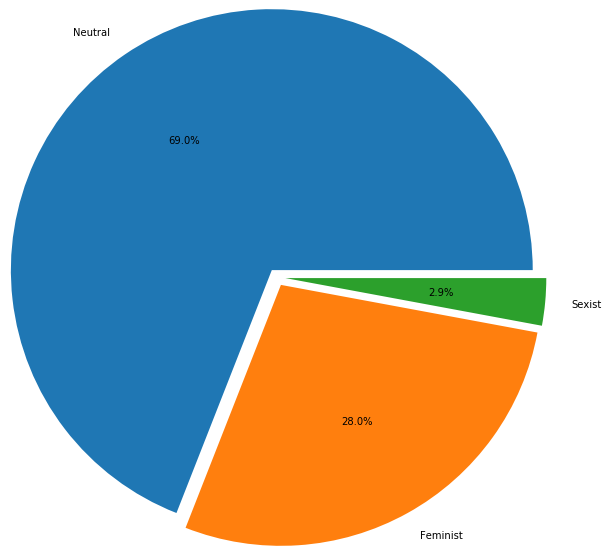

In [120]:
import matplotlib.pyplot as plt
ax = plt.pie(Final_with_track_id['Class'].value_counts(), autopct='%1.1f%%', 
        labels = Final_with_track_id['Class'].value_counts().index.tolist(), 
        explode= [0.1]*len(Final_with_track_id['Class_ID'].value_counts()), radius = 3)

ax

In [121]:
# Comment on some of the neutral songs maybe sexist or feminist. 
# But for visualization, we only show the dynamics between sexist and feminist music 
#Final_with_track_id = Final_with_track_id[Final_with_track_id.Class != 'Neutral']

In [122]:
#Final_with_track_id.groupby(['year','Class']).size()

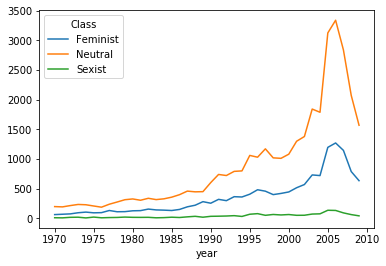

In [123]:
# then, the evolution of the feminist, sexist and neutral count per year;  (ax1)
# But seeing that the total number of songs available to us is different per year
# we do the proportion per year instead. 
ax1 = Final_with_track_id.groupby(['year','Class']).size().unstack().plot()

# df1 = Final_with_track_id.groupby('year', as_index=False)['Class'].size()

# ax2 = Final_with_track_id.groupby(['year','Class']).size()/ df1
# ax2.unstack().plot(figsize = (12,7))
#print(Final_with_track_id.groupby(['year','Class']).size())#/ Final_with_track_id.groupby(['year']).sum())


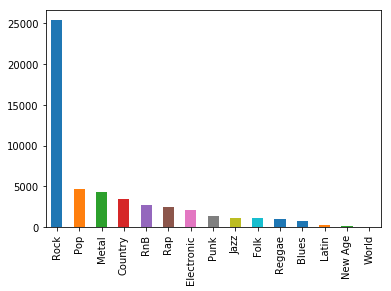

In [124]:
value_count_by_genre = Final_with_track_id['genre'].value_counts().plot(kind = 'bar')

In [125]:
# Group together trailing genre under GenreGroup
def label_race (row):
    if row['genre'] == 'Latin' or row['genre'] == 'New Age' or row['genre'] == 'World':
        return 'Other'
    else: 
        return row['genre']
    
Final_with_track_id['GenreGroup'] = Final_with_track_id.apply(label_race, axis=1)


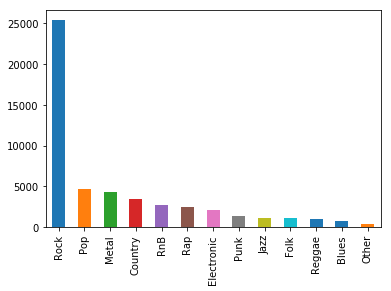

In [126]:
value_count_by_genre = Final_with_track_id['GenreGroup'].value_counts().plot(kind = 'bar')

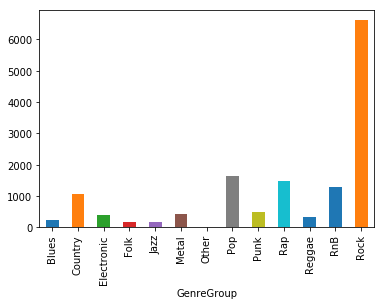

In [157]:
fem_count_per_genre = Final_with_track_id.loc[Final_with_track_id['Class'] == 'Feminist'].groupby(['GenreGroup']).size()#.plot()
fem = fem_count_per_genre.plot(kind = 'bar')

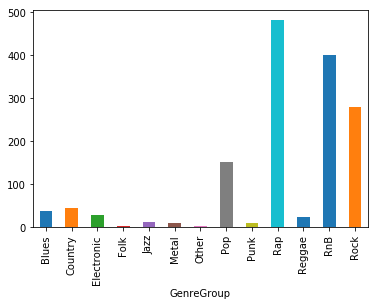

In [158]:
sexist_count_per_genre = Final_with_track_id.loc[Final_with_track_id['Class'] == 'Sexist'].groupby(['GenreGroup']).size()#.plot()
sexist = sexist_count_per_genre.plot(kind = 'bar')

In [127]:
#Final_with_track_id.loc[Final_with_track_id['Class'] == 'Feminist'].groupby(['decade','GenreGroup']).size().unstack().plot(figsize = (10,10), kind = 'bar', stacked = True) #, use_index = False)


In [128]:
# Drop all the neutral songs 

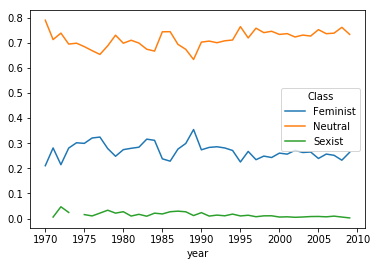

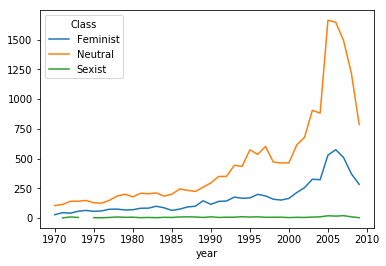

In [129]:
# Try different things.. segment by genre first, and then show proportion of fem, sexist, and neutral per year/ decade?
# display rock separately

#Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Rock'].groupby(['year','Class']).size().unstack().plot(figsize = (10,10), kind = 'bar', stacked = True) #, use_index = False)


# ROck music: proportion of feminist, sexist and neutral songs over years 
ax1 = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Rock'].groupby(['year','Class']).size()#.unstack().plot()

df1 = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Rock'].groupby('year', as_index=False)['Class'].size()

ax2 = ax1 / df1
ax2.unstack().plot()

ax1.unstack().plot()


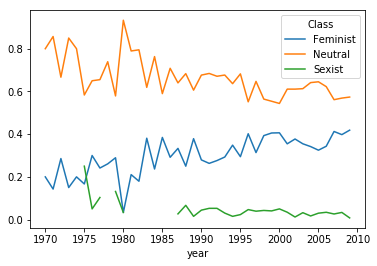

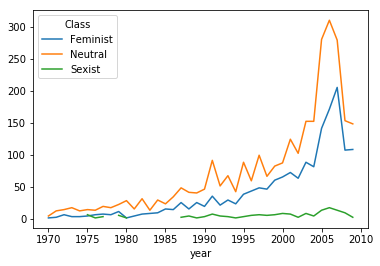

In [133]:
import matplotlib.pyplot as plt

Pop = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Pop'].groupby(['year','Class']).size()#.unstack().plot()

Pop1 = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Pop'].groupby('year', as_index=False)['Class'].size()

Pop2 = Pop / Pop1
Pop2.unstack().plot()

Pop.unstack().plot()
#print(Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Pop'].groupby(['year','Class']).size())
# every year, more feminist themed songs are released

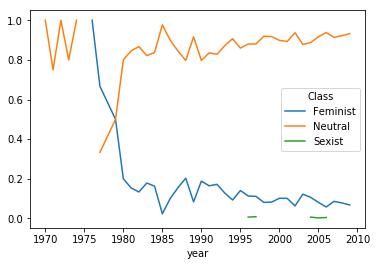

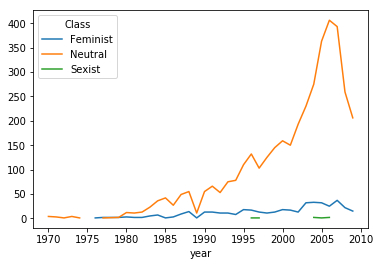

In [134]:
# Rock music: proportion of feminist, sexist and neutral songs over years 
Metal = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Metal'].groupby(['year','Class']).size()#.unstack().plot()

Metal1 = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Metal'].groupby('year', as_index=False)['Class'].size()


Metal2 = Metal / Metal1
Metal2.unstack().plot()
Metal.unstack().plot()

# due to the nature of metal music, women is not the common subject

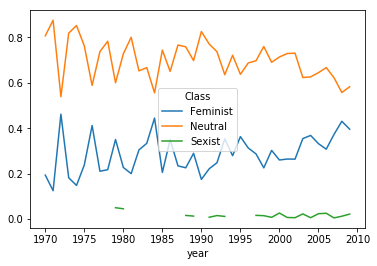

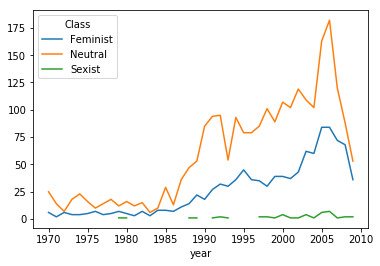

In [135]:
# Country music: proportion of feminist, sexist and neutral songs over years 
Country = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Country'].groupby(['year','Class']).size()#.unstack().plot()

Country1 = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Country'].groupby('year', as_index=False)['Class'].size()


Country2 = Country / Country1
Country2.unstack().plot()
Country.unstack().plot()

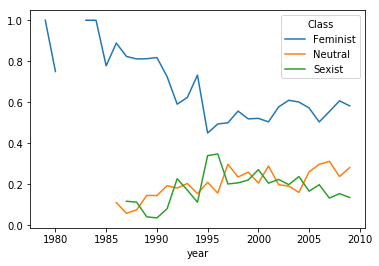

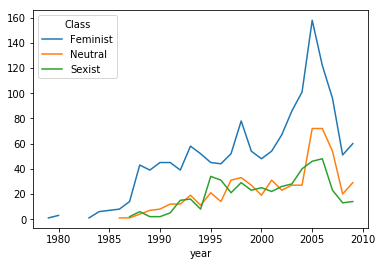

In [136]:
# Country music: proportion of feminist, sexist and neutral songs over years 
Rap = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Rap'].groupby(['year','Class']).size()#.unstack().plot()

Rap1 = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'Rap'].groupby('year', as_index=False)['Class'].size()


Rap2 = Rap / Rap1
Rap2.unstack().plot()
Rap.unstack().plot()

# reason we are able to detect sexism in rap music is because it's very explicit sexism (use of specific words)

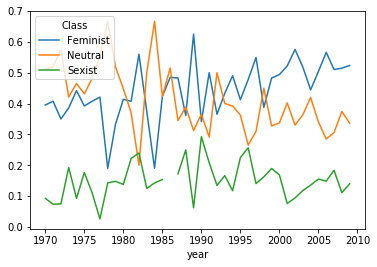

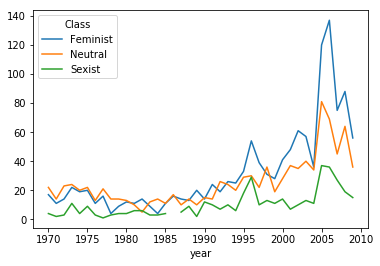

In [159]:
# Country music: proportion of feminist, sexist and neutral songs over years 
RnB = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'RnB'].groupby(['year','Class']).size()#.unstack().plot()

RnB1 = Final_with_track_id.loc[Final_with_track_id['GenreGroup'] == 'RnB'].groupby('year', as_index=False)['Class'].size()


RnB2 = RnB / RnB1
RnB2.unstack().plot()
RnB.unstack().plot()

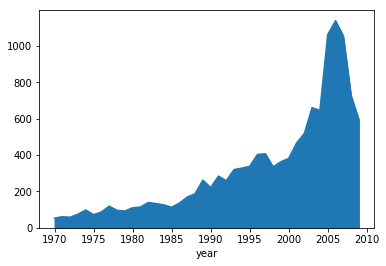

In [91]:
#Now (battle of sexism/feminism per year)
a = Final_with_track_id.groupby(['year', 'Prediction']).size()
#print(a) #eg. in 1970, 7 sexist songs, 195 neutral, 60 feminist => overall score (sum) 53

ax4 = Final_with_track_id.groupby(['year'])['Prediction'].sum().plot(kind = "Area")

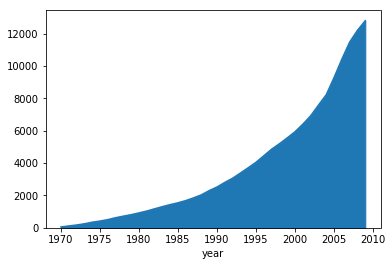

In [90]:
#Now (battle of sexism/feminism cumulative)

ax5 = Final_with_track_id.groupby(['year'])['Prediction'].sum().cumsum().plot(kind = 'Area')

In [ ]:
# maybe a lot of the neutral songs are sexist